# Оптимизация маркетинговых затрат в онлайн-сервисе по продаже билетов на развлекательные мероприятия
_____
#### Описание проекта

Необходимо помочь маркетологам онлайн-сервиса снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет. Для этого необходимо изучить: как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит компании каждый клиент, когда расходы на привлечение клиента окупаются.

______
#### В этом исследовании представлены данные онлайн-сервиса с июня 2017 по конец мая 2018 года:

* лог сервера с данными о посещениях сайта онлайн-сервиса,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.
______

#### Данное исследование разделим на несколько частей.

##### Часть 1. Загрузка данных и проверка их на ошибки:
* [1.1. Импорт библиотек, сохранение данных в переменные.](#section_1_1)
* [1.2. Изучение общей информации, нахождение проблем в данных.](#section_1_2)

##### Часть 2. Подготовка данных:
* [2.1. Приведение названий столбцов к нижнему регистру.](#section_2_1)
* [2.2. Приведение данных к нужным типам.](#section_2_2)

##### Часть 3. Расчёт метрик:
* [3.1. Расчёт продуктовых метрик.](#section_3_1)
* [3.2. Расчёт метрик электронной коммерции.](#section_3_2)
* [3.3. Расчёт маркетниговых метрик.](#section_3_3)

##### Часть 4. Выводы и рекомендации:
* [4.1. Определение источника трафика и типа устройств, на которые маркетологам стоит делать упор.](#section_4_1)
* [4.2. Описание выводов для подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.](#section_4_2)
* [4.3. Подведение итогов когортного анализа.](#section_4_3)
* [4.4. Описание различий метрик в разрезе устройств.](#section_4_4)


## Часть 1. Загрузка данных и проверка их на ошибки

<a id='section_1_1'></a>

### 1.1. Импорт библиотек, сохранение данных в переменные.

Импортируем необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

Сохраним данные в переменные.

In [2]:
try:
    visits = pd.read_csv('visits_log.csv') # данные о визитах
except:
    visits = pd.read_csv('visits_log.csv')
    
try:
    orders = pd.read_csv('orders_log.csv') # данные о заказах
except:
    orders = pd.read_csv('orders_log.csv')
    
try:
    costs = pd.read_csv('costs.csv') # данные о рекламных расходах
except:
    costs = pd.read_csv('costs.csv')    

<a id='section_1_2'></a>

### 1.2. Изучение общей информации, нахождение проблем в данных.

Изучим общую информацию трёх датасетов.

##### Изучение общей информации переменной visits

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Для упрощения работы необходимо привести названия заголовков столбцов к нижнему регистру и заменить пробелы на нижний пробел.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Некорректный тип данных для даты `End Ts` и `Start Ts`, необходимо его изменить.

Ввиду присутствия элементов с верхним регистром проверим наличие одинаковых по смыслу данных с разным регистром в столбце `Device`.

In [5]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

Со значениями столбца `Device` всё в порядке.

Проверим наличие дубликатов в данных.

In [6]:
visits.duplicated().sum()

0

Дубликатов не обнаружено.

###### Вывод по данным visits:
* в датафрейме не обнаружено дубликатов и пустых значений;
* название заголовков столбцов необходимо привести к нижнему регистру;
* тип данных для `End Ts` и `Start Ts` нужно изменить на `datetime`;
* в столбце `Device` ошибок с данными не обнаружено.

##### Изучение общей информации переменной orders

In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Для упрощения работы необходимо привести названия заголовков столбцов к нижнему регистру и заменить пробелы на нижний пробел..

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Некорректный тип данных для даты `Buy Ts`, необходимо его изменить.

Проверим наличие дубликатов в данных.

In [9]:
orders.duplicated().sum()

0

Дубликатов не обнаружено.

###### Вывод по данным orders:
* в датафрейме не обнаружено дубликатов и пустых значений;
* название заголовков столбцов необходимо привести к нижнему регистру;
* тип данных для `Buy Ts` нужно изменить на `datetime`.

##### Изучение общей информации переменной costs

In [10]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Заголовки столбцов приведены в нижнем регистре.

In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Некорректный тип данных для даты `dt`, необходимо его изменить.

Проверим наличие дубликатов в данных.

In [12]:
costs.duplicated().sum()

0

Дубликатов не обнаружено.

###### Вывод по данным costs:
* в датафрейме не обнаружено дубликатов и пустых значений;
* тип данных для `dt` нужно изменить на `datetime`.

Выявленные ошибки в данных исправим в слеудующей части проекта.

## Часть 2. Подготовка данных

<a id='section_2_1'></a>

### 2.1. Приведение названий столбцов к нижнему регистру.

Подобная проблема была обнаружена в двух датафреймах: `visits` и `orders`.

In [13]:
visits_columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders_columns = ['buy_ts', 'revenue', 'uid']
visits.columns = visits_columns
orders.columns = orders_columns

<a id='section_2_2'></a>

### 2.2. Приведение данных к нужным типам.

Изменение типа данных в столбцах `end_ts` и `start_ts` таблицы `visits` на `datetime`.

In [14]:
visits['end_ts'] = pd.to_datetime(visits['end_ts']) 
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Изменение типа данных в столбце `buy_ts` таблицы `orders` на `datetime`.

In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Изменение типа данных в столбце `dt` таблицы `costs` на `datetime`.

In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
visits_copy = visits.copy()
orders_copy = orders.copy()
costs_copy = costs.copy()

Названия столбцов в датафреймах были скорректированы, типы данных для даты исправлены.

## Часть 3. Расчёт метрик

<a id='section_3_1'></a>

### 3.1. Расчёт продуктовых метрик.

#### Количество уникальных пользователей в день, неделю, месяц.

Произведем оценку пользовательской активности, для этого нам нужно количество уникальных пользователей в день, неделю и месяц. Расчитаем следующие показатели: DAU, WAU, MAU.

Для начала выделим день, неделю, месяц и дату в отдельные столбцы.

In [18]:
visits['session_year'] = visits['start_ts'].dt.strftime('%Y')
visits['session_month'] = visits['start_ts'].dt.strftime('%Y_%m')
visits['session_week'] = visits['session_year'].apply(str) + '_' + visits['start_ts'].dt.strftime('%V').apply(str)
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017_12,2017_51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018_02,2018_08,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017_07,2017_26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018_05,2018_20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017_12,2017_52,2017-12-27


Посчитаем метрики.

In [19]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

In [20]:
print ('Среднее количество уникальных пользователей в день за период:', int(dau_total))
print ('Среднее количество уникальных пользователей в неделю за период:', int(wau_total))
print ('Среднее количество уникальных пользователей в месяц за период:', int(mau_total))

Среднее количество уникальных пользователей в день за период: 907
Среднее количество уникальных пользователей в неделю за период: 5716
Среднее количество уникальных пользователей в месяц за период: 23228


Данный показатель не дает ясной информации о пользовательской активности в течении исследуемого периода, поэтому посмотрим на количество уникальных пользователей в месяц и неделю. 

Для этого построим графики и проведем их анализ.

In [21]:
def plot_maker (df_group, x, y, marker, color, title, xlabel, ylabel, rotation): 
    plt.figure(figsize=(18,5))
    sns.lineplot(data=df_group, x=x, y=y, marker=marker, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid()
    plt.show()

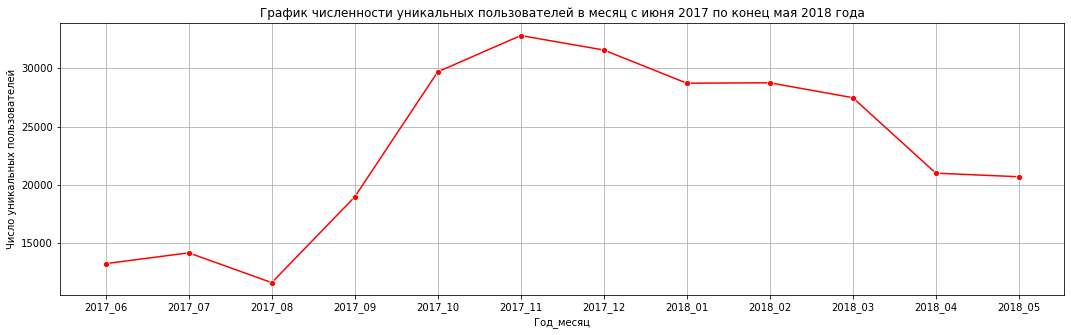

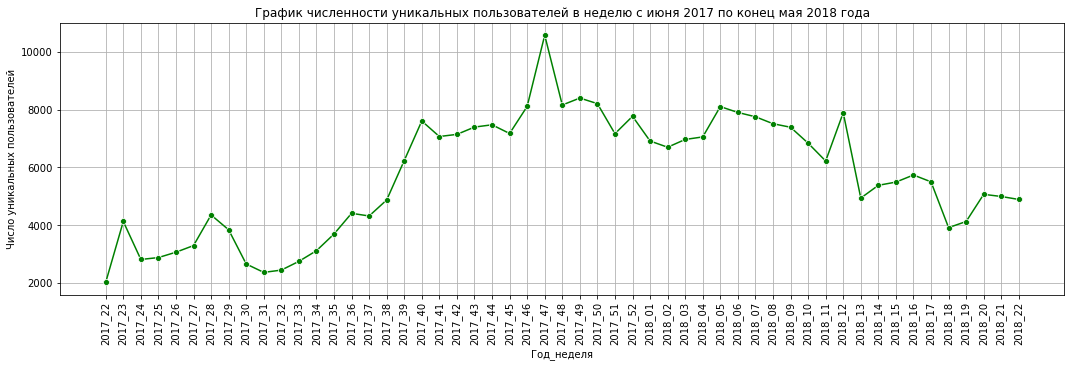

In [22]:
mau_grouped = visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()
plot_maker(mau_grouped, 'session_month', 'uid', 'o', 'red', 
          'График численности уникальных пользователей в месяц с июня 2017 по конец мая 2018 года',
          'Год_месяц',
          'Число уникальных пользователей',
          0)

wau_grouped = visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()
plot_maker(wau_grouped, 'session_week', 'uid', 'o', 'green', 
          'График численности уникальных пользователей в неделю с июня 2017 по конец мая 2018 года',
          'Год_неделя',
          'Число уникальных пользователей',
          90)

##### Выводы:

* наименьшее число уникальных пользователей наблюдалось летом 2017 года, такие низкие показатели можно объяснить сезонностью, которая повлияла на пользовательскую активность;
* резкое повышение в активности было замечено в сентябре-октябре 2017 года, рост продолжался до ноября 2017 г., но с меньшими темпами, такое поведение пользователей можно объяснить тем, что в этот период ведутся активные маркетинговые кампании и акции, тем самым привлекая новых пользователей;
* октябрь, ноябрь, декабрь (все 2017 г.) – месяцы с наибольшим количеством уникальных пользователей;
* наибольшее число уникальных пользователей наблюдался на 47-й неделе 2017 года (ноябрь), вероятно на этой неделе проводились несколько маркетинговых кампаний (например, черная пятница);
* декабрь 2017 - январь 2018 года – период новогодних и рождественских праздников, что объясняет высокий показатель кол-ва уникальных пользователей (не менее примерно 28 тыс.);
* февраль - март 2018 года – период праздников 14 февраля, День защитника Отечества и Международный женский день (показатель не менее примерно 27 тыс. уникальных пользователей);
* в апреле 2018 года наблюдается резкий спад в активности, что объясняется отсутствием праздников;
* количество уникальных пользователей в месяц было выше среднего (23 228) в период с октября 2017 по март 2018 года включительно;
* количество уникальных пользователей в неделю было выше среднего (5 716) в период с 39-й недели 2017 по 12-ю неделю 2018 года включительно.

#### Для сенсорных устройств

In [23]:
touch_visits = visits[visits['device']=='touch']
mau_total_touch = touch_visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
dau_total_touch = touch_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total_touch = touch_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print ('Среднее количество уникальных пользователей в день за период для сенсорных устройств:', int(dau_total_touch))
print ('Среднее количество уникальных пользователей в неделю за период для сенсорных устройств:', int(wau_total_touch))
print ('Среднее количество уникальных пользователей в месяц за период для сенсорных устройств:', int(mau_total_touch))

Среднее количество уникальных пользователей в день за период для сенсорных устройств: 252
Среднее количество уникальных пользователей в неделю за период для сенсорных устройств: 1634
Среднее количество уникальных пользователей в месяц за период для сенсорных устройств: 6825


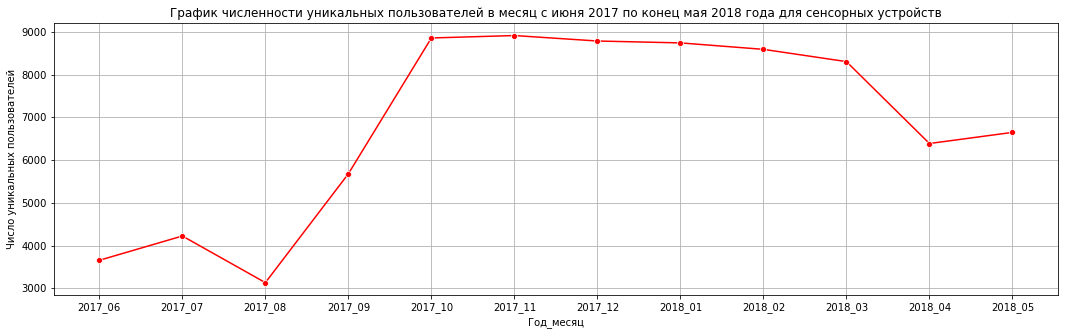

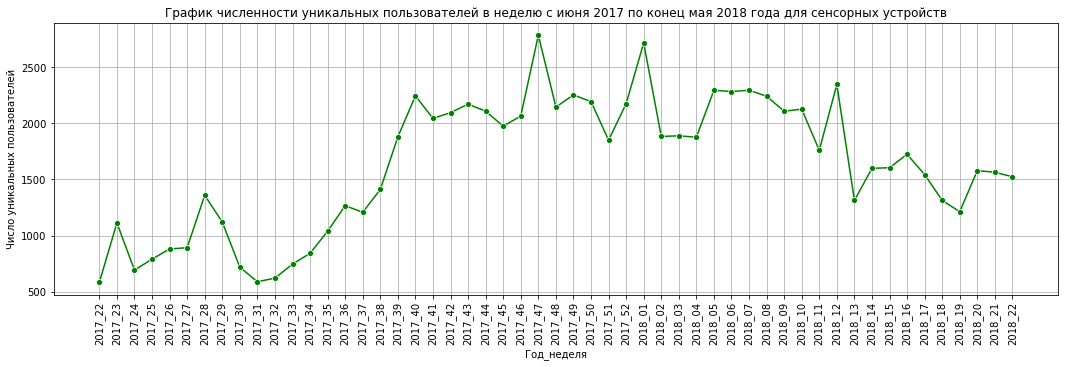

In [24]:
mau_touch_grouped = touch_visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()
plot_maker(mau_touch_grouped, 'session_month', 'uid', 'o', 'red', 
          'График численности уникальных пользователей в месяц с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_месяц',
          'Число уникальных пользователей',
          0)

wau_touch_grouped = touch_visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()
plot_maker(wau_touch_grouped, 'session_week', 'uid', 'o', 'green', 
          'График численности уникальных пользователей в неделю с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_неделя',
          'Число уникальных пользователей',
          90)

##### Выводы:

* число уникальных пользователей сенсорных устройств резко выросло с августа по октябрь 2017 года;
* с октября 2017 до марта 2018 года численность уникальных пользователей составляла не менее 8 тыс.;
* наименьшая активность пользователей сенсорных устройств наблюдалась в августе 2017 года;
* в течении периода наблюдений численность уникальных пользователей сенсорных устройств варьировалась от 3 тыс. до 9 тыс. в месяц.

#### Для стационарных устройств

In [25]:
desktop_visits = visits[visits['device']=='desktop']
mau_total_desktop = desktop_visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
dau_total_desktop = desktop_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total_desktop = desktop_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print ('Среднее количество уникальных пользователей в день за период для стациональных устройств:', int(dau_total_desktop))
print ('Среднее количество уникальных пользователей в неделю за период для стациональных устройств:', int(wau_total_desktop))
print ('Среднее количество уникальных пользователей в месяц за период для стациональных устройств:', int(mau_total_desktop))

Среднее количество уникальных пользователей в день за период для стациональных устройств: 659
Среднее количество уникальных пользователей в неделю за период для стациональных устройств: 4129
Среднее количество уникальных пользователей в месяц за период для стациональных устройств: 16724


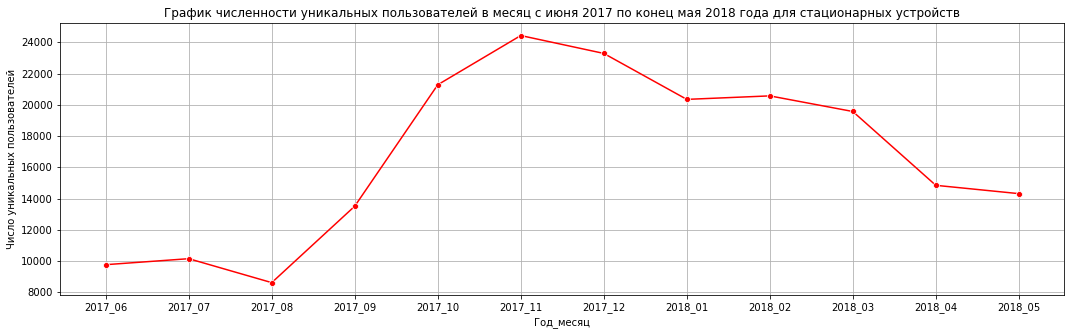

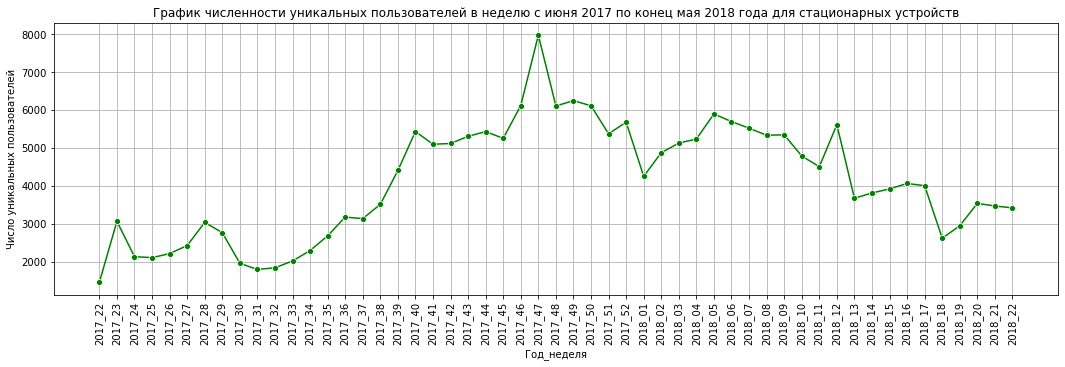

In [26]:
mau_desktop_grouped = desktop_visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()
plot_maker(mau_desktop_grouped, 'session_month', 'uid', 'o', 'red', 
          'График численности уникальных пользователей в месяц с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_месяц',
          'Число уникальных пользователей',
          0)

wau_desktop_grouped = desktop_visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()
plot_maker(wau_desktop_grouped, 'session_week', 'uid', 'o', 'green', 
          'График численности уникальных пользователей в неделю с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_неделя',
          'Число уникальных пользователей',
          90)

##### Выводы:

* число уникальных пользователей стационарных устройств резко выросло с августа по ноябрь 2017 года;
* с октября 2017 до марта 2018 года численность уникальных пользователей составляла не менее 8 тыс.;
* наименьшая активность пользователей сенсорных устройств наблюдалась в августе 2017 года;
* в течении периода наблюдений численность уникальных пользователей сенсорных устройств варьировалась от 8 тыс. до 24 тыс пользователей в месяц.

#### Количество сессий в день, неделю, месяц.

Расчитаем среднее количество сессий в день за исследуемых период.

In [27]:
mean_sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print ('Среднее количество сессий в день за период:', int(mean_sessions_per_day))

Среднее количество сессий в день за период: 987


В рамках исследуемого периода в день сервисом пользуются 987 раз, что немного выше числа уникальных пользователей в день, то есть каждый пользователь в среднем пользуется сервисом 1,09 раза в день. Из этого можно сделать вывод, что значительное большинство уникальных пользователей пользуется сервисом не более 1 раза в день.

Посмотрим как меняется среднее количество сессий в месяц и неделю. Для этого построим графики.

In [28]:
sessions = visits.groupby('session_date').agg({'uid': 'count'}).reset_index()
sessions.columns = ['session_date', 'sessions_per_day']

In [29]:
sessions['session_date'] = pd.to_datetime(sessions['session_date'])
sessions['session_year']  = sessions['session_date'].dt.strftime('%Y')
sessions['year_month']  = sessions['session_date'].dt.strftime('%Y_%m')
sessions['year_week']  = sessions['session_year'].apply(str) + '_' + sessions['session_date'].dt.strftime('%V').apply(str)


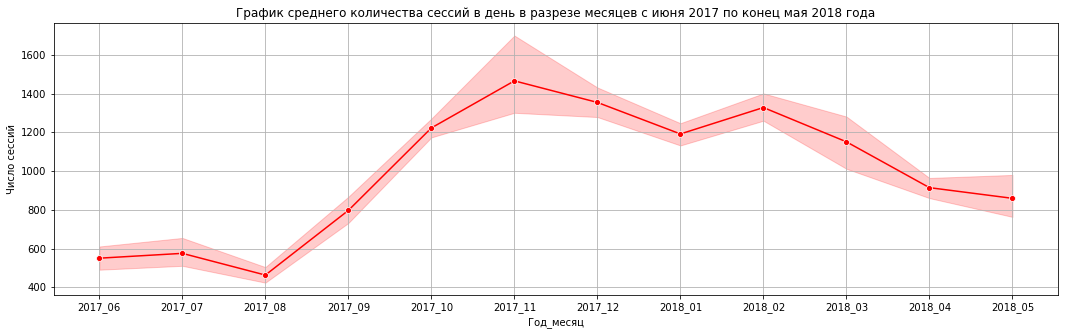

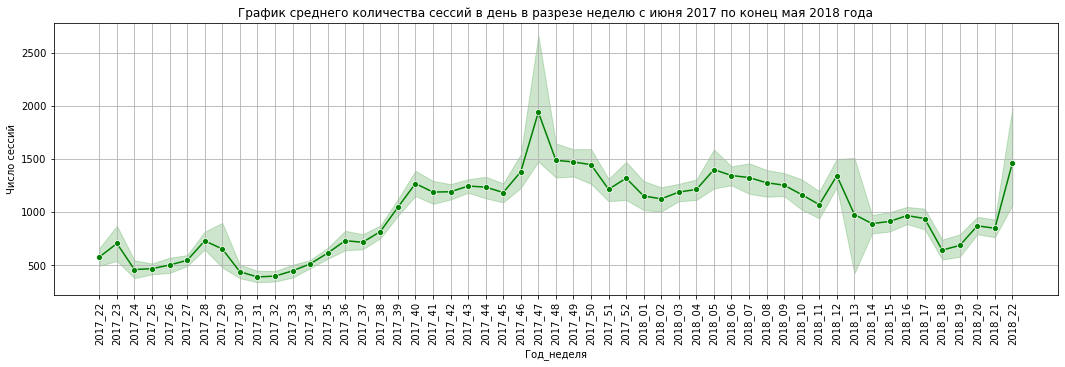

In [30]:
plot_maker(sessions, 'year_month', 'sessions_per_day', 'o', 'red', 
          'График среднего количества сессий в день в разрезе месяцев с июня 2017 по конец мая 2018 года',
          'Год_месяц',
          'Число сессий',
          0)

plot_maker(sessions, 'year_week', 'sessions_per_day', 'o', 'green', 
          'График среднего количества сессий в день в разрезе неделю с июня 2017 по конец мая 2018 года',
          'Год_неделя',
          'Число сессий',
          90)

##### Выводы:

* наименьшее число сессий в день наблюдалось летом 2017 года, такие низкие показатели можно объяснить сезонностью, которая повлияла на пользовательскую активность;
* резкое повышение среднего числа сессий в день было замечено в сентябре-ноябре 2017 года, такое поведение пользователей можно объяснить тем, что в этот период ведутся активные маркетинговые кампании и акции, тем самым привлекая новых пользователей;
* с октября 2017 по март 2018 года среднее число сессий было не ниже 1100 сессий в день, наибольшее среднее число сессий в день наблюдалось в ноябре 2017 года, а конкретно в 47 неделю 2017 года с показателем примерно в 2000 сессий в день, вероятно на этой неделе проводились крупные маркетинговые кампании (например, черная пятница);
* декабрь 2017 - январь 2018 года – период новогодних и рождественских праздников, что объясняет высокий показатель среднего кол-ва сессий в день (не менее 1,2 тыс.), в неделях декабря 2017 года (48-50) показатель был равен примерно 1,5 сессий в день;
* февраль - март 2018 года – период праздников 14 февраля, День защитника Отечества и Международный женский день (не менее 1,1 тыс. сессий в день);
* в апреле 2018 года наблюдается резкий спад в активности, что объясняется отсутствием праздников;
* высокое значение среднего числа сессий в день (почти 1,5 тыс.) наблюдалось в 22-й неделе 2018 г., такое поведение пользователей можно назвать аномальным, сравнивая с 22-й неделей 2017 г.; 
* среднее кол-во сессий в день было выше среднего (987) в период с октября 2017 по март 2018 года включительно;
* среднее кол-во сессий в день было выше среднего (987) в период с 39-й недели 2017 по 12-ю неделю 2018 года включительно, а также в 22-ю неделю 2018 года (май).

#### Для сенсорных устройств

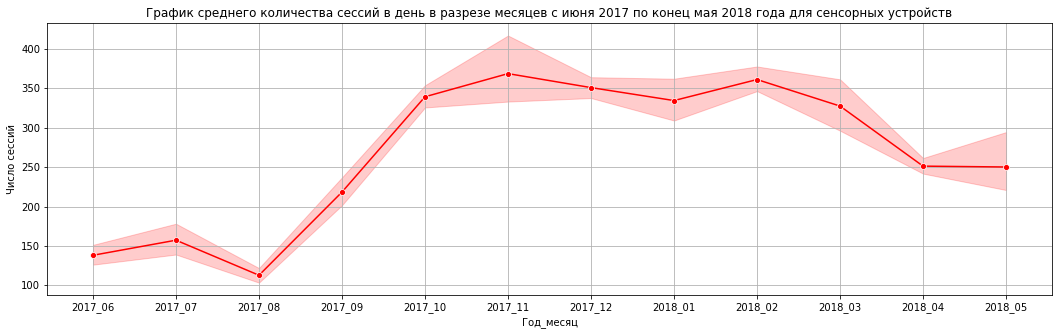

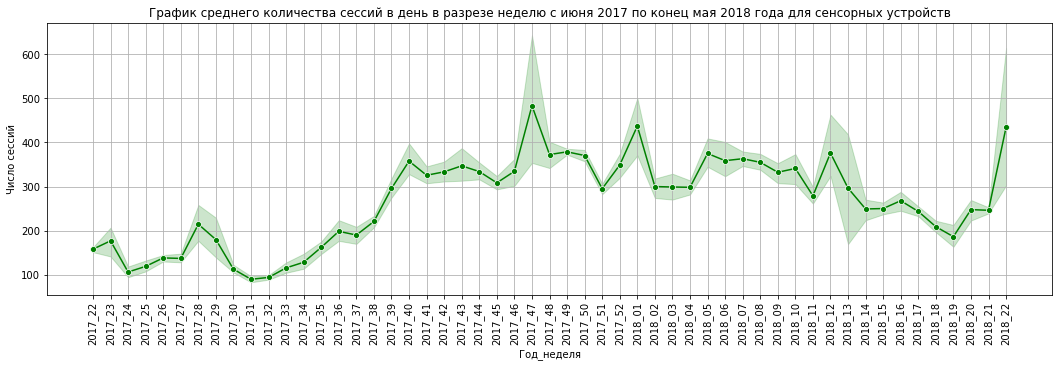

In [31]:
sessions_touch = touch_visits.groupby('session_date').agg({'uid': 'count'}).reset_index()
sessions_touch.columns = ['session_date', 'sessions_per_day']
sessions_touch['session_date'] = pd.to_datetime(sessions_touch['session_date'])
sessions_touch['session_year']  = sessions_touch['session_date'].dt.strftime('%Y')
sessions_touch['year_month']  = sessions_touch['session_date'].dt.strftime('%Y_%m')
sessions_touch['year_week']  = sessions_touch['session_year'].apply(str) + '_' + sessions_touch['session_date'].dt.strftime('%V').apply(str)

plot_maker(sessions_touch, 'year_month', 'sessions_per_day', 'o', 'red', 
          'График среднего количества сессий в день в разрезе месяцев с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_месяц',
          'Число сессий',
          0)

plot_maker(sessions_touch, 'year_week', 'sessions_per_day', 'o', 'green', 
          'График среднего количества сессий в день в разрезе неделю с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_неделя',
          'Число сессий',
          90)

##### Выводы:

* среднее количество сессий сенсорных устройств растет с августа по ноябрь 2017 года;
* с февраля по апрель 2018 год наблюдается снижение среднего количества сессий для сенсорных устройств;
* в период черной пятницы и зимних праздников среднее количество сессий не опускалось ниже 325;
* наименьшее среднее количество сессий наблюдалось в августе 2018 года (около 100);
* среднее число сессий в месяц варьировалось от 100 до 375 для сенсорных устройств.

#### Для стационарных устройств

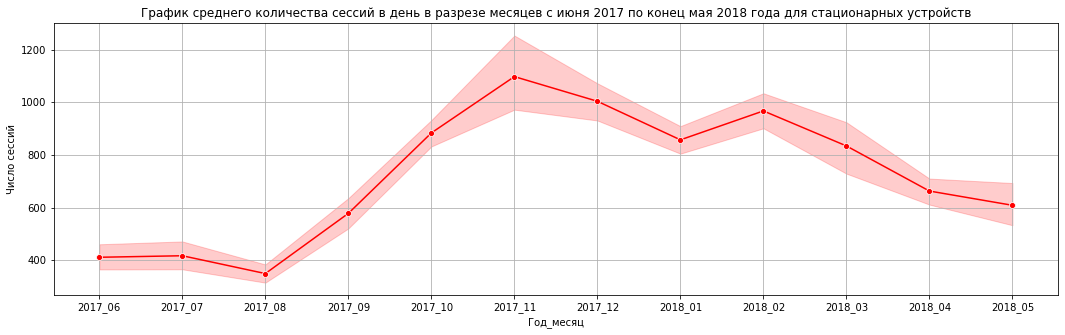

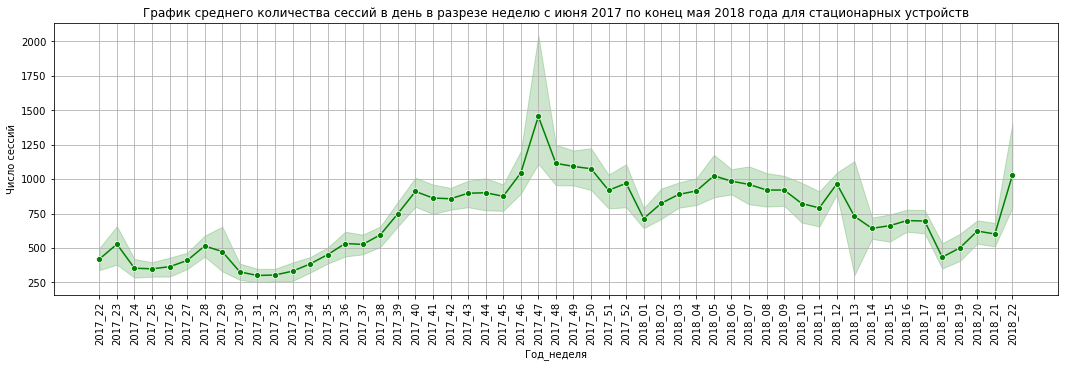

In [32]:
sessions_desktop = desktop_visits.groupby('session_date').agg({'uid': 'count'}).reset_index()
sessions_desktop.columns = ['session_date', 'sessions_per_day']
sessions_desktop['session_date'] = pd.to_datetime(sessions_desktop['session_date'])
sessions_desktop['session_year']  = sessions_desktop['session_date'].dt.strftime('%Y')
sessions_desktop['year_month']  = sessions_desktop['session_date'].dt.strftime('%Y_%m')
sessions_desktop['year_week']  = sessions_desktop['session_year'].apply(str) + '_' + sessions_desktop['session_date'].dt.strftime('%V').apply(str)

plot_maker(sessions_desktop, 'year_month', 'sessions_per_day', 'o', 'red', 
          'График среднего количества сессий в день в разрезе месяцев с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_месяц',
          'Число сессий',
          0)

plot_maker(sessions_desktop, 'year_week', 'sessions_per_day', 'o', 'green', 
          'График среднего количества сессий в день в разрезе неделю с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_неделя',
          'Число сессий',
          90)

##### Выводы:

* среднее количество сессий стационарных устройств растет с августа по ноябрь 2017 года (пик в период исследования);
* с октября 2017 по март 2018 среднее число сессий составляло от 800 в месяц для стационарных устройств;
* наименьшее среднее количество сессий наблюдалось в августе 2018 года (около 400);
* среднее число сессий в месяц варьировалось примерно от 400 до 1100 для стационарных устройств.

#### Продолжительность пользовательской сессии.

Для расчета продолжительности пользовательской сессии посчитаем разность между концом сессии `end_ts` и её началом `start_ts`.

In [33]:
visits['session_duration'] = visits['end_ts'] - visits['start_ts']

In [34]:
print('Средняя продолжительность пользовательской сессии:', round(visits['session_duration'].mean().total_seconds()//60), 'минут',
     int(visits['session_duration'].mean().total_seconds()%60), 'секунды.')
print('Средняя продолжительность пользовательской сессии:', round(visits['session_duration'].mean().total_seconds()), 'секунды.')

Средняя продолжительность пользовательской сессии: 10 минут 43 секунды.
Средняя продолжительность пользовательской сессии: 643 секунды.


Показатель средней продолжительности пользовательской сессии почти в 11 минут можно назвать достаточно хорошим, то есть пользователи задерживаются на сайте. Также за это время пользователь может успеть произвести покупку.

Чтобы оценить динамику изменения средней продолжительности пользовательской сессии построим графики в разрезе месяцев и недель.

In [35]:
visits['session_duration_sec'] = visits['session_duration'] / np.timedelta64(1, 's')
duration = visits.groupby('session_date').agg({'session_duration_sec': 'mean'}).reset_index()
duration['session_date'] = pd.to_datetime(duration['session_date'])
duration['session_year']  = duration['session_date'].dt.strftime('%Y')
duration['year_month']  = duration['session_date'].dt.strftime('%Y_%m')
duration['year_week']  = duration['session_year'].apply(str) + '_' + duration['session_date'].dt.strftime('%V').apply(str)
duration.head()


,session_date,session_duration_sec,session_year,year_month,year_week
0,2017-06-01,666.320783,2017,2017_06,2017_22
1,2017-06-02,619.840426,2017,2017_06,2017_22
2,2017-06-03,606.958071,2017,2017_06,2017_22
3,2017-06-04,554.309804,2017,2017_06,2017_22
4,2017-06-05,624.450168,2017,2017_06,2017_23


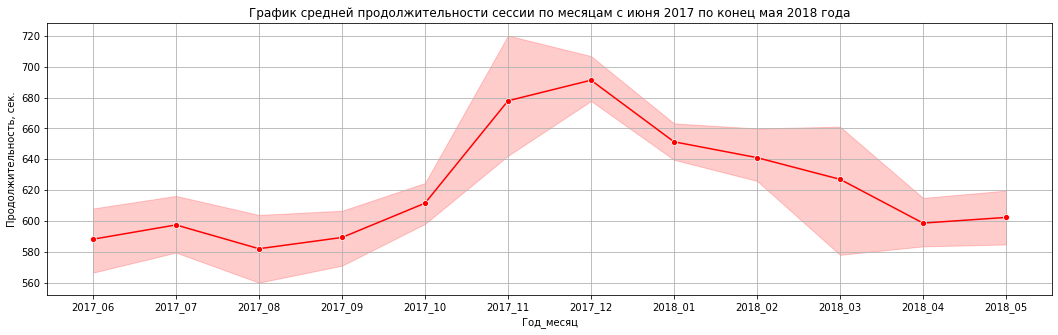

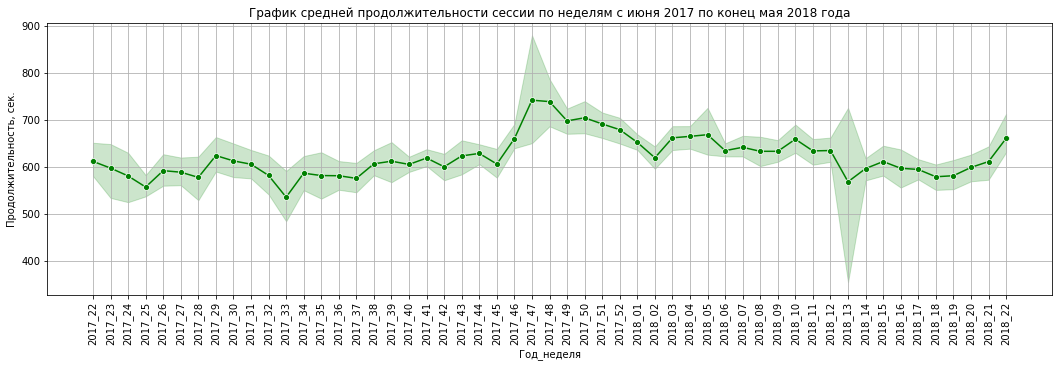

In [36]:
plot_maker(duration, 'year_month', 'session_duration_sec', 'o', 'red', 
          'График средней продолжительности сессии по месяцам с июня 2017 по конец мая 2018 года',
          'Год_месяц',
          'Продолжительность, сек.',
          0)

plot_maker(duration, 'year_week', 'session_duration_sec', 'o', 'green', 
          'График средней продолжительности сессии по неделям с июня 2017 по конец мая 2018 года',
          'Год_неделя',
          'Продолжительность, сек.',
          90)

Также построим гистограмму продолжительности пользовательских сессий.

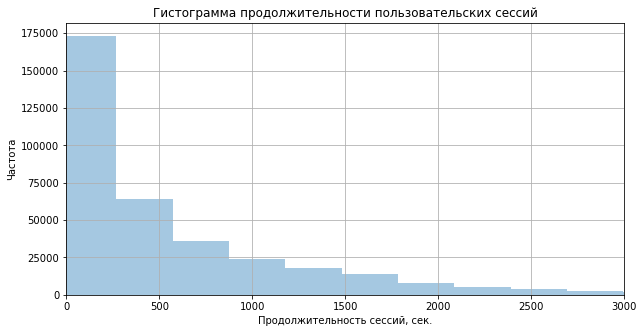

In [37]:
plt.figure(figsize=(10,5))
plt.xlim(0, 3000)
sns.distplot(visits['session_duration_sec'], bins=150, kde=False)
plt.title('Гистограмма продолжительности пользовательских сессий')
plt.xlabel('Продолжительность сессий, сек.')
plt.ylabel('Частота')
plt.grid()
plt.show()

##### Выводы:

* наименьшие показатели средней продолжительности сессии наблюдались с июня по сентябрь 2017 года и в апреле-мае 2018 года, такие низкие показатели можно объяснить сезонностью, а также отсутствием крупных праздников, что повлияло на пользовательскую активность;
* резкое повышение средней продолжительности сессии было замечено в октябре-декабре 2017 года, такое поведение пользователей можно объяснить тем, что в этот период ведутся активные маркетинговые кампании и акции, тем самым привлекая новых пользователей, а также фактором новогодних и рождественских праздников;
* с ноября 2017 по январь 2018 года средняя продолжительность сессии была выше средней (643 секунды);
* наибольшая средняя продолжительность сессии наблюдалась в декабре 2012 года (примерно 690 секунд), вполне вероятно, что пользователи проводят больше времени, выбирая новогодние подарки для нескольких человек, для чего обычно требуется больше времени;
* с января по апрель 2018 года наблюдалось постепенное снижение длительности сессии; 
* в апреле 2018 года наблюдается резкий спад в активности, что объясняется отсутствием праздников;
* высокое значение средней продолжительности сессии (почти 650 секунд) наблюдалось на 22-й неделе 2018 г., сравнивая с 22-й неделей 2017 г., можно предположить, что пользователи проводят больше времени в сервисе в период перед летним сезоном для подготовки к нему; 
* средняя продолжительность сессии была выше среднего (634 секунды) в период с 46-й недели 2017 по 1-ю неделю 2018 года включительно, с 3-й недели по 5-ю 2018 года, на 10-й неделе 2018 года и на 22-й неделе в 2018 года;



* онлайн-сервисом чаще всего пользуются от 0 до 250 секунд (примерно 175 тыс. сессий), с увеличением продолжительности частота уменьшается;
* менее 75000 сессии длились более 300 секунд;
* чаще всего сессии длились чуть больше 4 минут (от 0 до 250 секунд), за такое небольшое время вряд ли можно полностью ознакомиться с объектом покупки и приобрести его, то есть вполне вероятно большинство сессий не заканчивались покупкой.

#### Для сенсорных устройств

In [38]:
touch_visits['session_duration'] = touch_visits['end_ts'] - touch_visits['start_ts']
print('Средняя продолжительность пользовательской сессии:', round(touch_visits['session_duration'].mean().total_seconds()//60), 'минут',
     int(touch_visits['session_duration'].mean().total_seconds()%60), 'секунд.')
print('Средняя продолжительность пользовательской сессии:', round(touch_visits['session_duration'].mean().total_seconds()), 'секунд.')

Средняя продолжительность пользовательской сессии: 7 минут 59 секунд.
Средняя продолжительность пользовательской сессии: 480 секунд.


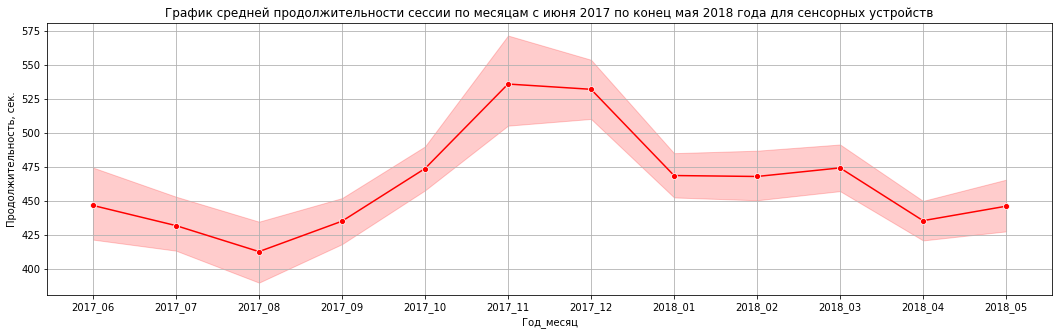

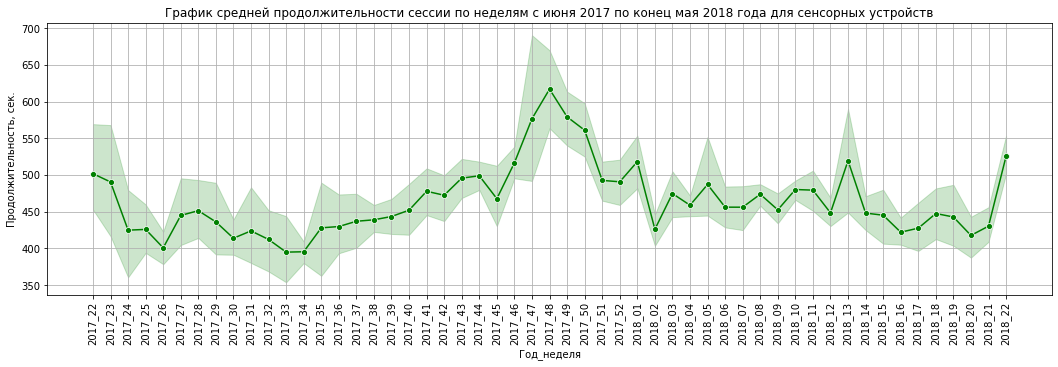

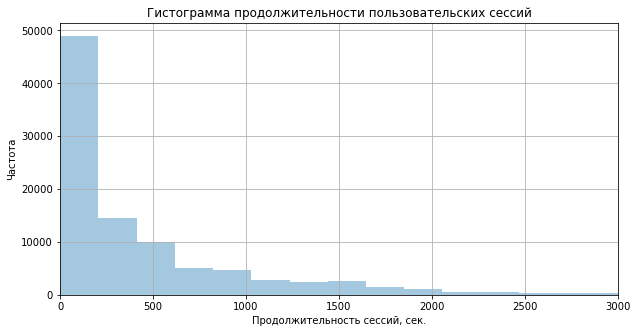

In [39]:
touch_visits['session_duration_sec'] = touch_visits['session_duration'] / np.timedelta64(1, 's')
touch_duration = touch_visits.groupby('session_date').agg({'session_duration_sec': 'mean'}).reset_index()
touch_duration['session_date'] = pd.to_datetime(touch_duration['session_date'])
touch_duration['session_year']  = touch_duration['session_date'].dt.strftime('%Y')
touch_duration['year_month']  = touch_duration['session_date'].dt.strftime('%Y_%m')
touch_duration['year_week']  = touch_duration['session_year'].apply(str) + '_' + touch_duration['session_date'].dt.strftime('%V').apply(str)

plot_maker(touch_duration, 'year_month', 'session_duration_sec', 'o', 'red', 
          'График средней продолжительности сессии по месяцам с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_месяц',
          'Продолжительность, сек.',
          0)

plot_maker(touch_duration, 'year_week', 'session_duration_sec', 'o', 'green', 
          'График средней продолжительности сессии по неделям с июня 2017 по конец мая 2018 года для сенсорных устройств',
          'Год_неделя',
          'Продолжительность, сек.',
          90)

plt.figure(figsize=(10,5))
plt.xlim(0, 3000)
sns.distplot(touch_visits['session_duration_sec'], bins=150, kde=False)
plt.title('Гистограмма продолжительности пользовательских сессий')
plt.xlabel('Продолжительность сессий, сек.')
plt.ylabel('Частота')
plt.grid()
plt.show()

##### Выводы:

* средняя продолжительность пользовательской сессии на сенсорных устройствах составила 8 минут или 480 секунд;
* летом 2017 года наблюдалось снижение средней дилтельности пользовательской сессии для сенсорных устройств;
* средняя продолжительность сессиии на сенсорных устройствах растет с августа по ноябрь 2017 год;
* после нового года в январе 2018 году наблдается резкое снижение средней длительности сессии на сенсорных устройствах с 525 до 475 секунд;
* относительно марта 2018 года наблюдается снижение средней продолжительности сессии в апреле до 430 секунд;



* онлайн-сервисом в разрезе сенсорных устройств чаще всего пользуются от 0 до примерно 200 секунд (менее 50 тыс. сессий), с увеличением продолжительности частота уменьшается;
* менее 15000 сессии длились более 200 секунд;
* чаще всего сессии на сенсорных устройствах длились чуть больше 3 минут (от 0 до 200 секунд), за такое небольшое время также вряд ли можно полностью ознакомиться с объектом покупки и приобрести его, то есть вполне вероятно большинство сессий на сенсорных устройствах не заканчивались покупкой, а ограничивались лишь ознакомлением.

#### Для стационарных устройств

In [40]:
desktop_visits['session_duration'] = desktop_visits['end_ts'] - desktop_visits['start_ts']
print('Средняя продолжительность пользовательской сессии:', round(desktop_visits['session_duration'].mean().total_seconds()//60), 'минут',
     int(desktop_visits['session_duration'].mean().total_seconds()%60), 'секунд.')
print('Средняя продолжительность пользовательской сессии:', round(desktop_visits['session_duration'].mean().total_seconds()), 'секунды.')

Средняя продолжительность пользовательской сессии: 11 минут 43 секунд.
Средняя продолжительность пользовательской сессии: 703 секунды.


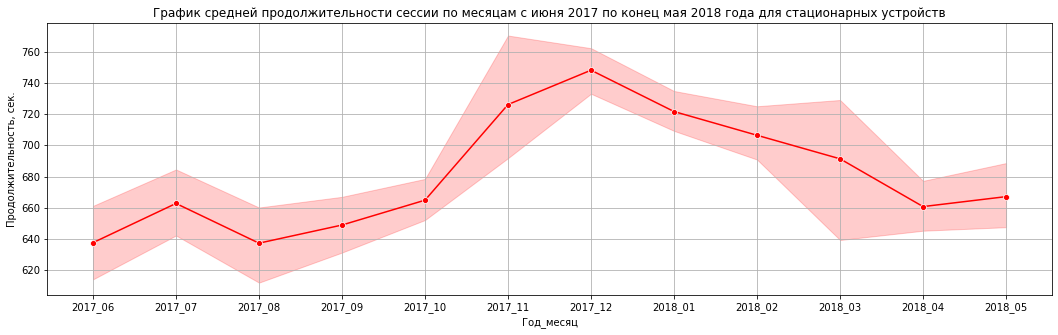

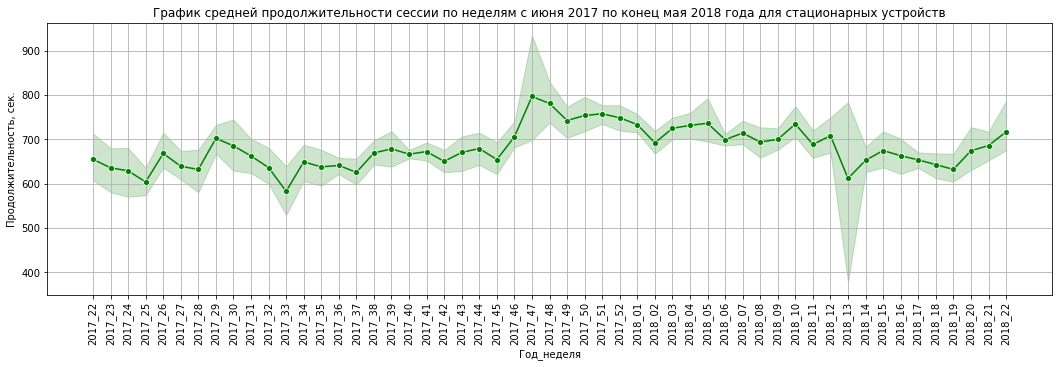

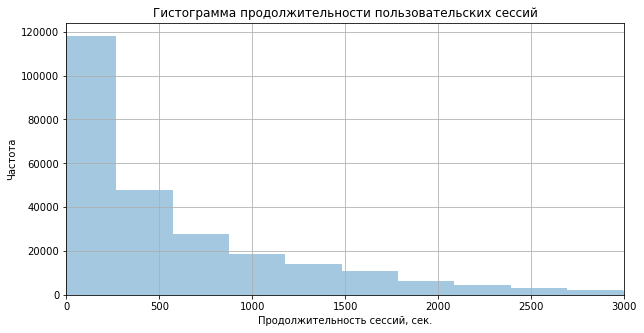

In [41]:
desktop_visits['session_duration_sec'] = desktop_visits['session_duration'] / np.timedelta64(1, 's')
desktop_duration = desktop_visits.groupby('session_date').agg({'session_duration_sec': 'mean'}).reset_index()
desktop_duration['session_date'] = pd.to_datetime(desktop_duration['session_date'])
desktop_duration['session_year']  = desktop_duration['session_date'].dt.strftime('%Y')
desktop_duration['year_month']  = desktop_duration['session_date'].dt.strftime('%Y_%m')
desktop_duration['year_week']  = desktop_duration['session_year'].apply(str) + '_' + desktop_duration['session_date'].dt.strftime('%V').apply(str)

plot_maker(desktop_duration, 'year_month', 'session_duration_sec', 'o', 'red', 
          'График средней продолжительности сессии по месяцам с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_месяц',
          'Продолжительность, сек.',
          0)

plot_maker(desktop_duration, 'year_week', 'session_duration_sec', 'o', 'green', 
          'График средней продолжительности сессии по неделям с июня 2017 по конец мая 2018 года для стационарных устройств',
          'Год_неделя',
          'Продолжительность, сек.',
          90)

plt.figure(figsize=(10,5))
plt.xlim(0, 3000)
sns.distplot(desktop_visits['session_duration_sec'], bins=150, kde=False)
plt.title('Гистограмма продолжительности пользовательских сессий')
plt.xlabel('Продолжительность сессий, сек.')
plt.ylabel('Частота')
plt.grid()
plt.show()

##### Выводы:

* средняя продолжительность пользовательской сессии на стационарных устройствах составила 11 минут 43 секунды или 703 секунды;
* летом 2017 года наблюдалось нестабильная динамика средней дилтельности пользовательской сессии для стационарных устройств с ростом в июле и снижением в августе;
* средняя продолжительность сессиии на стационарных устройствах растет с августа по декабрь 2017 год;
* после нового года с января по апрель 2018 года наблдается снижение средней длительности сессии на стационарных устройствах с 750 до 660 секунд;
* чаще всего сессия на сенсорных устройствах в среднем продолжалась от 600 до 720 секунд;



* онлайн-сервисом в разрезе стационарных устройств чаще всего пользуются от 0 до примерно 250 секунд (менее 120 тыс. сессий), с увеличением продолжительности частота уменьшается;
* менее 50000 сессии длились более 250 секунд;
* чаще всего сессии на стационарных устройствах длились чуть больше 4 минут (от 0 до 250 секунд), за такое небольшое время также вряд ли можно полностью ознакомиться с объектом покупки и приобрести его, то есть вполне вероятно большинство сессий на стационарных устройствах не заканчивались покупкой, а ограничивались лишь ознакомлением.

#### Расчёт Retention Rate датафрейма `visits`

Для расчета Retention Rate применим когорный анализ. Когортой в данном случае будет являться месяц, где клиенты посетили ресурс впервые. За период исследования для анализа набралось 12 когорт.

Для когортного анализа коэффициента удержания составим тепловую карту.

Text(87.0, 0.5, 'Когорта')

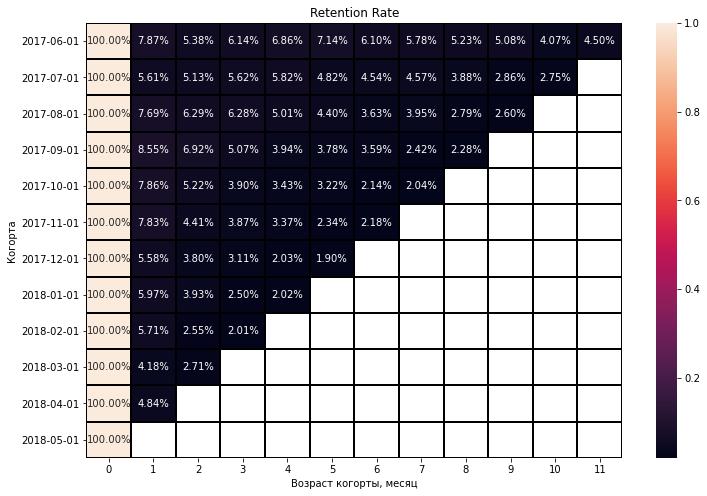

In [42]:
first_visit = visits.groupby('uid')['start_ts'].min() 
first_visit.name = 'first_visit'
visits = visits.join(first_visit, on='uid')
 
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
 
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int') 
 
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
 
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
 
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
 
plt.figure(figsize=(12, 8))
plt.title('Retention Rate')
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

Также оценим средний показатель Retention Rate для каждой продолжительности "жизни" когорты.

In [43]:
retention_avg = cohorts.groupby('cohort_lifetime').agg({'retention': 'mean'})
retention_avg

,retention
cohort_lifetime,
0,1.000000
1,0.065167
2,0.046333
3,0.042760
4,0.040595
5,0.039444
6,0.036957
7,0.037509
8,0.035465


##### Выводы:

* когорта июня 2017 года в первый месяц жизни показала 2-й по значению коэф. удержания, относительно значений остальных когорт в первый месяц, и в целом в течении последующих 10 месяцев имела относитльно остальных высокое значение показателя, например, в 5 месяце (ноябрь 2017 года) эта когорта показала высокий среди остальных когорт Retention Rate в 7.14%, но затем показатель пошлел на спад;
* когорта июля 2017 года не имела Retention Rate выше 6% за весь период жизни, наибольшее значение было в 4-й месяц (ноябрь 2017 года) равное 5.82%, затем показатель пошел на спад;
* когорты августа-декабря 2017 года имели самый высокий Retention Rate в 1-й месяц жизни, но затем их показатели постепенно снижались, скорее всего высокая пользовательская активность в первый месяц жизни была обусловлена предстоящими праздниками;
* когорты декабря 2017 - марта 2018 года не имели показателей коэф. удержания выше 6%, также их показатели снижались каждый месяц жизни;
* средний показатель коэф. удержания в 1-й месяц был выше, чем в остальные месяцы жизни когорт, также с каждым месяцем показатель идет на спад, что говорит о том, что с каждым месяцем все меньше пользователей возвращается к услугам онлайн-сервиса.



Расчитаем коэффициент удержания для различных устройств по тем же когортам.

#### Retention Rate для каждого девайса датафрейма `visits`

##### Для сенсорных устройств

Text(87.0, 0.5, 'Когорта')

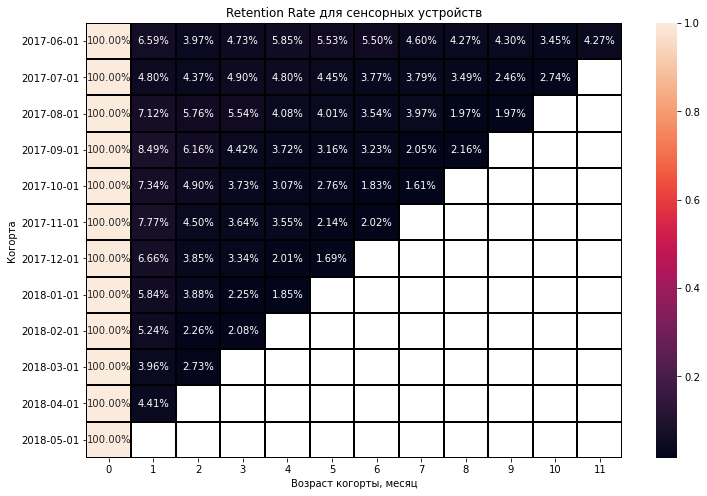

In [44]:
cohorts_touch_visits = visits[visits['device']=='touch'].groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count_touch = cohorts_touch_visits[cohorts_touch_visits['cohort_lifetime'] == 0][['first_visit_month','uid']]
 
initial_users_count_touch = initial_users_count_touch.rename(columns={'uid':'cohort_users'}) 
 
cohorts_touch_visits = cohorts_touch_visits.merge(initial_users_count_touch,on='first_visit_month') 
cohorts_touch_visits['retention'] = cohorts_touch_visits['uid']/cohorts_touch_visits['cohort_users']
retention_touch_pivot = cohorts_touch_visits.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
 
plt.figure(figsize=(12, 8))
plt.title('Retention Rate для сенсорных устройств')
retention_touch_pivot.index = retention_touch_pivot.index.strftime('%Y-%m-%d')
sns.heatmap(retention_touch_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

In [45]:
retention_touch_avg = cohorts_touch_visits.groupby('cohort_lifetime').agg({'retention': 'mean'})
retention_touch_avg

,retention
cohort_lifetime,
0,1.000000
1,0.062032
2,0.042356
3,0.038487
4,0.036166
5,0.033899
6,0.033160
7,0.032018
8,0.029721


###### Выводы:

* когорта июня 2017 года для сенсорных устройств в первый месяц показала самый высокий Retention Rate за весь период жизни (6.59%), также с 4-го по 6-й месяц жизни включительно показатель был выше 5% (октябрь-декабрь 2017 года), но затем показатель пошлел на спад;
* когорта июля 2017 года для сенсорных устройств не имела Retention Rate выше 5% за весь период жизни, наибольшее значение было в 3-й месяц (октябрь 2017 года) равное 4.90%, затем показатель пошел на спад;
* когорты августа-декабря 2017 года для сенсорных устройств имели самый высокий Retention Rate в 1-й месяц жизни, но затем их показатели постепенно снижались, скорее всего высокая пользовательская активность в первый месяц жизни была обусловлена предстоящими праздниками, однако стоит отметить, что в период февральских-мартовских праздников Retention Rate либо снижался, либо незначительно рос;
* когорты января - марта 2018 года для сенсорных устройств  не имели показателей коэф. удержания выше 6%, также их показатели снижались каждый месяц жизни.
* пользователи сенсорных устройств реже возращаются к услугам онлайн-сервиса с каждым месяцем жизни когорты.


##### Для стационарных устройств

Text(87.0, 0.5, 'Когорта')

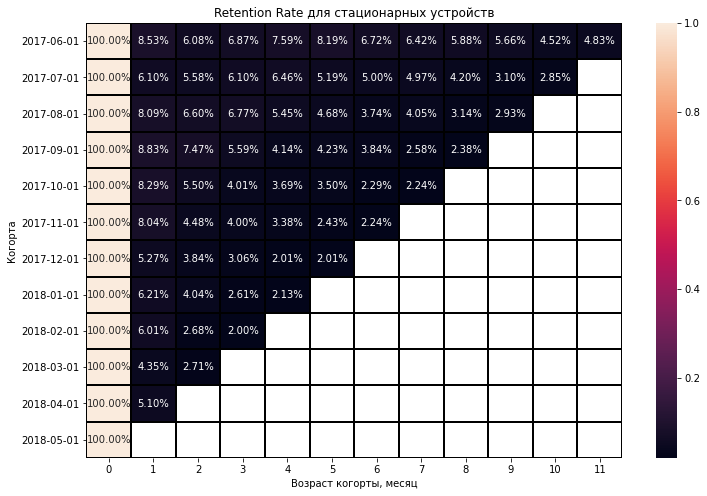

In [46]:
cohorts_desktop_visits = visits[visits['device']=='desktop'].groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count_desktop = cohorts_desktop_visits[cohorts_desktop_visits['cohort_lifetime'] == 0][['first_visit_month','uid']]
 
initial_users_count_desktop = initial_users_count_desktop.rename(columns={'uid':'cohort_users'}) 
 
cohorts_desktop_visits = cohorts_desktop_visits.merge(initial_users_count_desktop,on='first_visit_month') 
cohorts_desktop_visits['retention'] = cohorts_desktop_visits['uid']/cohorts_desktop_visits['cohort_users']
retention_desktop_pivot = cohorts_desktop_visits.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
 
plt.figure(figsize=(12, 8))
plt.title('Retention Rate для стационарных устройств')
retention_desktop_pivot.index = retention_desktop_pivot.index.strftime('%Y-%m-%d')
sns.heatmap(retention_desktop_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

In [47]:
retention_desktop_avg = cohorts_desktop_visits.groupby('cohort_lifetime').agg({'retention': 'mean'})
retention_desktop_avg

,retention
cohort_lifetime,
0,1.000000
1,0.068029
2,0.048974
3,0.045578
4,0.043577
5,0.043175
6,0.039740
7,0.040531
8,0.039005


###### Выводы:

* когорта июня 2017 года для пользователей персональных компьютеров (далее – ПК) в первый месяц показала самый высокий Retention Rate за весь период жизни (8.53%), также с 4-го по 5-й месяц жизни включительно показатель был выше 7% (октябрь-ноябрь 2017 года), но затем показатель пошлел на спад;
* когорта июля 2017 года не имела Retention Rate выше 7% за весь период жизни, наибольшее значение было в 4-й месяц (ноябрь 2017 года) равное 6.46%, затем показатель пошел на спад;
* когорты августа-декабря 2017 года имели самый высокий Retention Rate в 1-й месяц жизни, но затем их показатели постепенно снижались, скорее всего высокая пользовательская активность в первый месяц жизни была обусловлена предстоящими праздниками, однако стоит отметить, что в период февральских-мартовских праздников Retention Rate либо снижался, либо незначительно рос;
* когорты января - февраля 2018 года имели показателей коэф. удержания выше 6%, но также их показатели снижались каждый месяц жизни.
* пользователи ПК реже возращаются к услугам онлайн-сервиса с каждым месяцем жизни когорты.


##### Общий вывод по Retention Rate для каждого устройства:

* сравнивая средние показатели Retention Rate в первые 6 месяцев жизни когорт можно сказать, пользователи ПК охотнее возвращаются к услугам онлайн-сервиса, чем пользователи сенсорных устройств вполне возможно из-за удобства использования сервисом на ПК;
* с каждым месяцем жизни когорты пользователи обоих устройств реже возвращаются к услугам онлайн-сервиса;


<a id='section_3_2'></a>

### 3.2. Расчёт метрик электронной коммерции.

#### Среднее время с момента посещения сайта до первой покупки.

Добавим информацию о первом посещении `first_visit` из датафрейма `visits`.

In [48]:
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']
orders = orders.merge(first_visits, on='uid', how='left')
orders.info() # проверим корректность объединения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   first_visit  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.9 MB


Теперь вычислим дату первого заказа для каждого пользователя.

In [49]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns = ['uid', 'first_order']
first_order.name = 'first_order'
orders = orders.merge(first_order, on='uid', how='left')

Посчитаем время между первым посещением и первой покупкой и посчитаем среднее время с момента посещения сайта до первой покупки.

In [50]:
orders['from_start_to_buy_time'] = orders['first_order'] - orders['first_visit']
orders['from_start_to_buy_time_days'] = (orders['first_order'] - orders['first_visit']).dt.days
orders['from_start_to_buy_time_int'] = orders['from_start_to_buy_time'].values.astype(np.int64)
means = orders.groupby('uid').agg({'from_start_to_buy_time_int':'mean'}).reset_index()
means['from_start_to_buy_time_int'] = pd.to_timedelta(means['from_start_to_buy_time_int'])
print ('Среднее время с момента посещения сайта до первой покупки:', means['from_start_to_buy_time_int'].mean())

Среднее время с момента посещения сайта до первой покупки: 16 days 21:40:10.550064343


orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].apply(np.round).astype('int') 

mean_days_to_buy_pivot = orders.pivot_table(index='first_order_month',
    columns='cohort_lifetime',
    values='from_start_to_buy_time_days',
    aggfunc='mean') 

plt.figure(figsize=(12, 8))
plt.title('Среднее количество дней от первого посещения до первой покупки')
mean_days_to_buy_pivot.index = mean_days_to_buy_pivot.index.strftime('%Y-%m-%d')
sns.heatmap(mean_days_to_buy_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

In [51]:
orders['first_visit_month'] = orders['first_visit'].astype('datetime64[M]')
orders.groupby('first_visit_month').agg({'from_start_to_buy_time_days':'mean'})

,from_start_to_buy_time_days
first_visit_month,
2017-06-01,38.226825
2017-07-01,40.920169
2017-08-01,32.672100
2017-09-01,23.287621
2017-10-01,16.054067
2017-11-01,14.005683
2017-12-01,9.682200
2018-01-01,7.869048
2018-02-01,5.120279


##### Выводы:

* В среднем пользователи начинают совершать покупку через полмесяца после первого посещения сайта;
* наибольшее количество дней с момента посещения сайта до первой покупки наблюдалось летом 2017 года, когда показатель не опускался ниже 30 дней (1 месяц);
* с июля по май наблюдалось снижение значения метрики, но снижение в месяцы уменьшения пользовательской активности (февраль-май) можно объяснить границами периода исследования, те кто посещали сайт впервые могли не совершить покупку в период исследования;
* к сезону распродаж и зимних праздников (период повышения пользовательской активности) время от первого посещения до первой покупки уменьшается.

#### Cреднее количество покупок на одного клиента.

Для расчёта среднего количества покупок на одного клиента применим когортный анализ. Когортой в данном случае будет являться месяц, когда клиенты впервые совершили покупку. За период исследования для анализа среднего количества покупок на одного клиента набралось 12 когорт.

In [52]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohorts_orders = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': ['sum','count']}).reset_index()

report = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
 
report.columns = ['first_order_month', 'n_buyers', 'order_month', 'revenue','n_orders']

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['orders_per_buyer'] = report['n_orders'] / report['n_buyers']

output = report.pivot_table(
       index='first_order_month', 
       columns='age', 
       values='orders_per_buyer', 
       aggfunc='sum').round(3).cumsum(axis=1)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.164,1.251,1.337,1.449,1.593,1.701,1.837,1.923,2.028,2.104,2.151,2.194
2017-07-01,1.137,1.189,1.251,1.305,1.342,1.385,1.417,1.443,1.473,1.485,1.513,
2017-08-01,1.119,1.198,1.271,1.33,1.392,1.437,1.473,1.53,1.564,1.598,,
2017-09-01,1.136,1.221,1.283,1.347,1.373,1.415,1.457,1.479,1.503,,,
2017-10-01,1.144,1.216,1.253,1.281,1.311,1.335,1.355,1.384,,,,
2017-11-01,1.179,1.276,1.321,1.373,1.406,1.42,1.445,,,,,
2017-12-01,1.153,1.215,1.261,1.302,1.322,1.346,,,,,,
2018-01-01,1.122,1.188,1.235,1.254,1.277,,,,,,,
2018-02-01,1.122,1.183,1.206,1.225,,,,,,,,


Text(87.0, 0.5, 'Когорта')

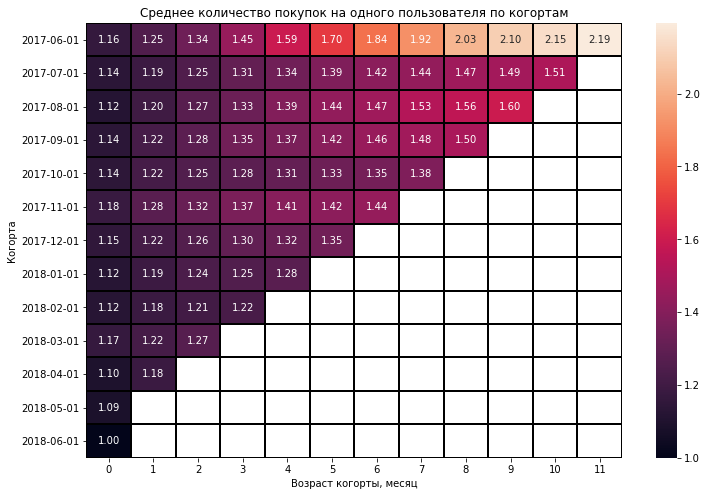

In [53]:
plt.figure(figsize=(12, 8))
plt.title('Среднее количество покупок на одного пользователя по когортам')
output.index = output.index.strftime('%Y-%m-%d')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

Выделим когорты, чья продолжительность жизни больше или равна 6 месяцам.

Text(87.0, 0.5, 'Когорта')

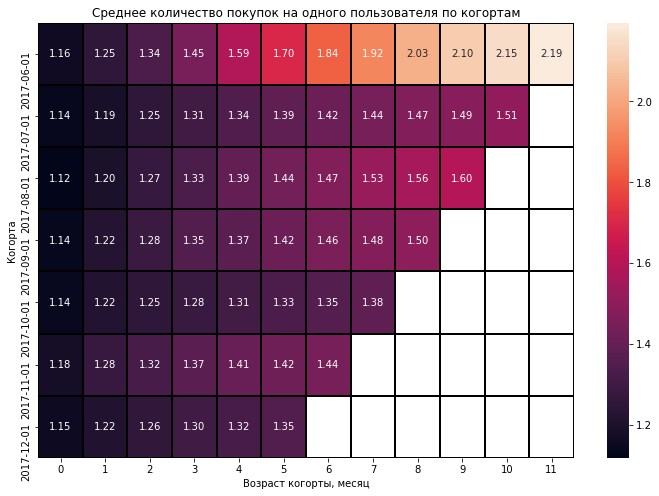

In [54]:
six_m = report[(report['first_order_month'] >= '2017-06-01') & (report['first_order_month'] <= '2017-12-01')]
output_six_m = six_m.pivot_table(
       index='first_order_month', 
       columns='age', 
       values='orders_per_buyer', 
       aggfunc='sum').round(3).cumsum(axis=1)
output_six_m.fillna('')

plt.figure(figsize=(12, 8))
plt.title('Среднее количество покупок на одного пользователя по когортам')
output_six_m.index = output_six_m.index.strftime('%Y-%m-%d')
sns.heatmap(output_six_m, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

##### Выводы:

* каждая когорта в 0-й месяц жизни в среднем совершала не более 1.2 покупки на пользователя;
* когорта июня 2017 года имела наибольший прирост рассматриваемого показателя относительно остальных когорт;
* с каждым месяцем жизни когорты среднее количество покупок на пользователя имело тенденцию к постепенному росту;
* к 5-му месяцу жизни каждая когорта в среднем совершала не менее 1.3 покупки на пользователя;
* наибольший показатель среднего количества покупок на одного пользователя в 5-м месяце жизни когорты наблюдался для когорты июля 2017 года (1.7), 5-й месяц жизни этой когорты – ноябрь, месяц с высокой пользовательской активностью;
* наименьший показатель среднего количества покупок на одного пользователя в 5-м месяце жизни когорты наблюдался для когорты октября 2017 года (1.33), 5-й месяц жизни этой когорты – март, в этот период происходит снижение пользовательской активности.

#### Средняя выручка с пользователя.

Оценим динамику изменения показателя средней выручки с пользователя по месяцам и неделям.

In [55]:
orders['session_year']  = orders['buy_ts'].dt.strftime('%Y')
orders['year_month']  = orders['buy_ts'].dt.strftime('%Y_%m')
orders['year_week']  = orders['session_year'].apply(str) + '_' + orders['buy_ts'].dt.strftime('%V').apply(str)


Для начала посчитаем выручку с каждого пользователя по месяцам и неделям , затем построим графики для анализа динамики средней выручки с пользователя по этим данным.

In [56]:
# группируем данные по месяцу и уникальному пользователю, считаем средний чек каждого пользователя в месяц
revenue_mean_month = orders.groupby(['year_month','uid']).agg({'revenue':'mean'}) 
# теперь группируем данные по месяцу и получаем средний чек с одного пользователя
revenue_mean_month = revenue_mean_month.groupby('year_month').agg({'revenue':'mean'}).reset_index()
# такие же действия проведем с группировкой по неделям
revenue_mean_week = orders.groupby(['year_week','uid']).agg({'revenue':'mean'})
revenue_mean_week = revenue_mean_week.groupby('year_week').agg({'revenue':'mean'}).reset_index()

print ('Средняя выручка с одного пользователя в разрезе месяцев:', round(revenue_mean_month['revenue'].mean(),2), 'у.е.')
print ('Средняя выручка с одного пользователя в разрезе недель:', round(revenue_mean_week['revenue'].mean(),2), 'у.е.')

Средняя выручка с одного пользователя в разрезе месяцев: 4.3 у.е.
Средняя выручка с одного пользователя в разрезе недель: 4.54 у.е.


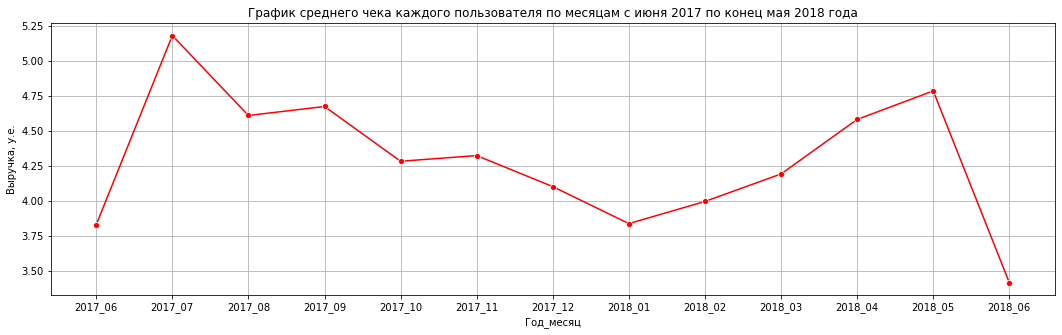

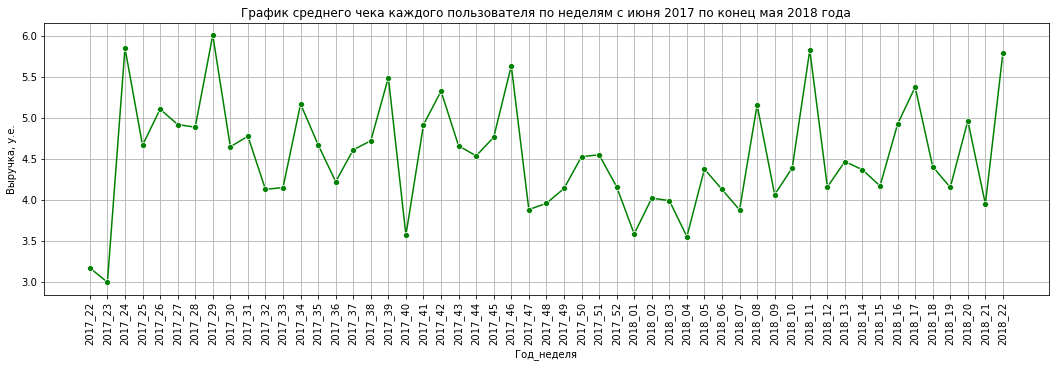

In [57]:
plot_maker(revenue_mean_month, 'year_month', 'revenue', 'o', 'red', 
          'График среднего чека каждого пользователя по месяцам с июня 2017 по конец мая 2018 года',
          'Год_месяц',
          'Выручка, у.е.',
          0)

plot_maker(revenue_mean_week, 'year_week', 'revenue', 'o', 'green', 
          'График среднего чека каждого пользователя по неделям с июня 2017 по конец мая 2018 года',
          'Год_неделя',
          'Выручка, у.е.',
          90)

##### Выводы:

* показатель средней выручки в разрезе недель был равен 4.5 у.е., варьировался от 3 до 6 у.е в течении периода наблюдений;
* показатель средней выручки в разрезе месяцев был равен 4.3 у.е., варьировался примерно от 3.75 до 5.25 у.е в течении периода наблюдений;
* наблюдается нестабильная динамика среднего чека по неделям;
* наименьшая средняя выручка с пользователя наблюдалась июне 2017 года и январе 2018 года;
* наибольшая средняя выручка с пользователя была зафиксирована в июле 2017 года;
* средний чек снижался с июля 2017 года по январь 2018 года;
* на 47-й неделе наблюдался спад среднего чека, при высокой пользовательской активности.

#### Изменение во времени накопительного LTV по когортам.

Оценим «пожизненную» ценность клиента при помощи метрики LTV и когортного анализа.

In [58]:
margin_rate = 1
report['ltv'] = (report['revenue'] * margin_rate) / report['n_buyers']

output_ltv = report.pivot_table(
       index='first_order_month', 
       columns='age', 
       values='ltv', 
       aggfunc='mean').round(3).cumsum(axis=1)
    


output_ltv.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.209,5.647,6.602,7.625,8.361,9.311,9.893,10.446,11.052,11.623,11.88
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,,
2017-09-01,5.645,6.763,7.284,11.26,11.661,12.308,13.01,13.253,13.437,,,
2017-10-01,5.004,5.54,5.731,5.888,6.04,6.16,6.245,6.36,,,,
2017-11-01,5.155,5.554,5.754,6.079,6.227,6.281,6.396,,,,,
2017-12-01,4.738,4.998,5.923,6.988,7.301,7.639,,,,,,
2018-01-01,4.136,4.431,4.735,4.878,4.941,,,,,,,
2018-02-01,4.157,4.435,4.514,4.588,,,,,,,,


Нам необходимо провести анализ для когорт, проживших не менее 6 месяцев, поэтому отфильтруем данные.

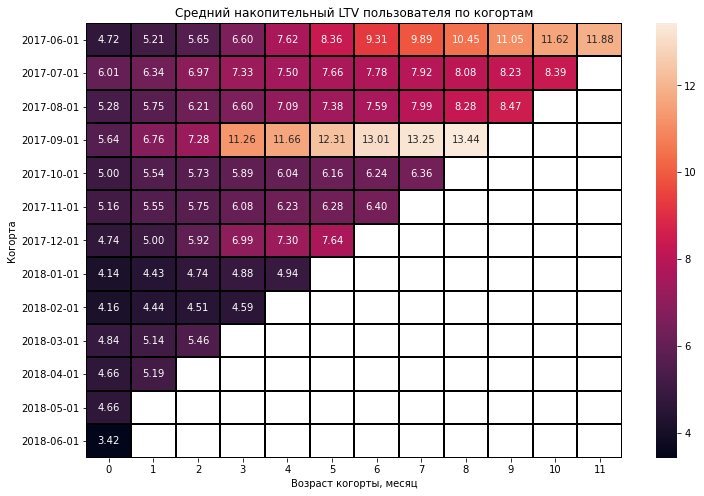

In [59]:
plt.figure(figsize=(12, 8))
plt.title('Средний накопительный LTV пользователя по когортам')
output_ltv.index = output_ltv.index.strftime('%Y-%m-%d')
sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')
plt.show()

##### Выводы:

* средний ltv на 5-й месяц жизни был наивысшим для когорты сентября 2017 года, то есть в феврале клиенты этой когорты в среднем приносили сервису 12.31 у.е.;
* средний ltv на 5-й месяц жизни был наименьшим для когорты октября 2017 года, то есть в марте клиенты этой когорты в среднем приносили сервису 6.16 у.е.;
* в целом средний ltv рос с каждым месяцем у каждой когорты;
* высокий темп роста показателя наблюдался для когорт сентрябя 2017 года, низкий темп роста – для когорт октября и ноября 2017 года.

<a id='section_3_3'></a>

### 3.3. Расчёт маркетниговых метрик.

#### Общая сумма расходов на маркетинг, распределение по источникам и изменение этого распределения во времени.

Посчитаем общую сумму расходов на маркетинг.

In [60]:
costs_sum = costs['costs'].sum()
print ('Общая сумма расходов на маркетинг:', costs_sum, 'у.е.')

Общая сумма расходов на маркетинг: 329131.62 у.е.


Проанализируем распределение расходов по источником, для этого построим круговую диаграмму.

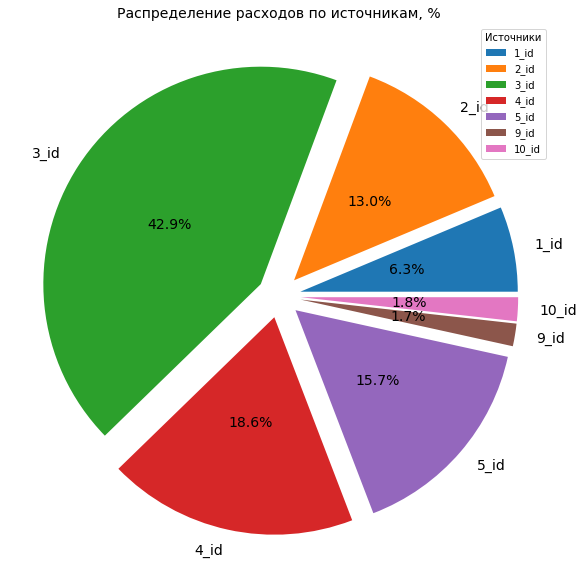

In [61]:
costs_sum_per_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_sum_per_source['source_id'] = costs_sum_per_source['source_id'].apply(str) + '_id' 
pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x=costs_sum_per_source['costs'], autopct="%.1f%%", explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels=costs_sum_per_source['source_id'], pctdistance=0.5, 
       textprops={'fontsize': 14})
plt.legend(title = 'Источники')
plt.title("Распределение расходов по источникам, %", fontsize=14);


In [62]:
costs_sum_per_source

,source_id,costs
0,1_id,20833.27
1,2_id,42806.04
2,3_id,141321.63
3,4_id,61073.60
4,5_id,51757.10
5,9_id,5517.49
6,10_id,5822.49


Маркетинговые расходы на источник 3 составляют почти половину всех расходов (42.9%). Примерно 20% расходов были направлены на источник 4, 15,7% – на источник 5. Наименьшую долю расходов имели источники 9 и 10 (1,7% и 1,8% соответственно).

Оценим динамику маркетинговых расходов по месяцам в разрезе источников.

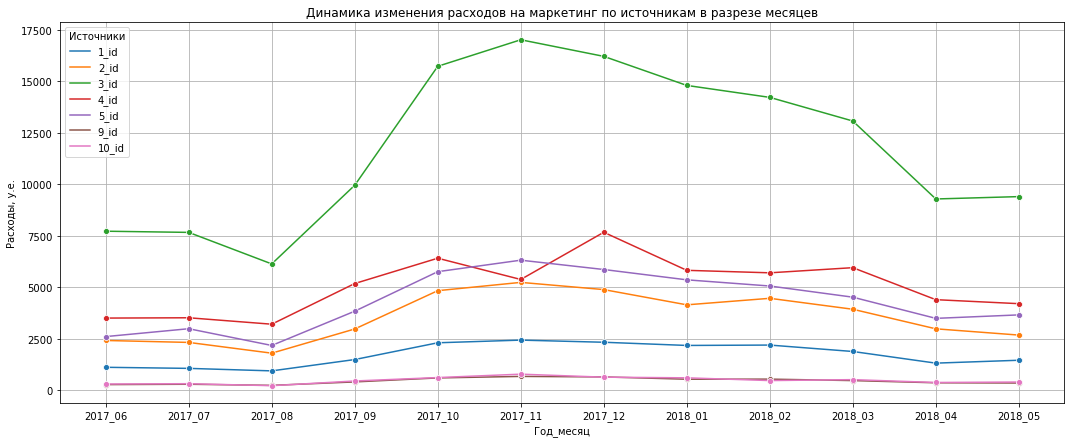

In [63]:
costs_date = costs.copy()
costs_date['session_year']  = costs_date['dt'].dt.strftime('%Y')
costs_date['year_month']  = costs_date['dt'].dt.strftime('%Y_%m')
costs_date['year_week']  = costs_date['session_year'].apply(str) + '_' + costs_date['dt'].dt.strftime('%V').apply(str)

source_costs_monthly = costs_date.groupby(['source_id','year_month']).agg({'costs':'sum'}).reset_index()
source_costs_monthly['source_id'] = source_costs_monthly['source_id'].apply(str) + '_id' 
plt.figure(figsize=(18,7))
sns.lineplot(data=source_costs_monthly,x='year_month',y='costs',hue='source_id', marker='o')
plt.title('Динамика изменения расходов на маркетинг по источникам в разрезе месяцев')
plt.xlabel('Год_месяц')
plt.ylabel('Расходы, у.е.')
plt.legend(loc='upper left',title='Источники')
plt.grid()
plt.show()


Text(86.09375, 0.5, 'Год_месяц')

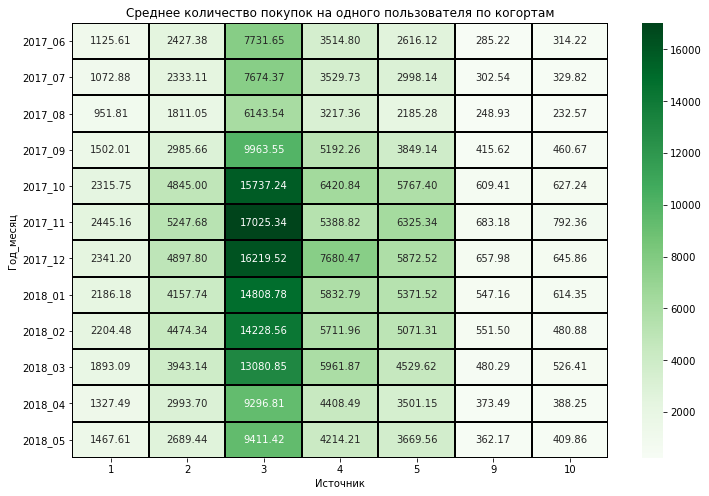

In [64]:
output_costs = costs_date.pivot_table(
       index='year_month', 
       columns='source_id', 
       values='costs', 
       aggfunc='sum')
output_costs.fillna('')

plt.figure(figsize=(12, 8))
plt.title('Среднее количество покупок на одного пользователя по когортам')

sns.heatmap(output_costs, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='Greens')
plt.xlabel('Источник')
plt.ylabel('Год_месяц')

##### Выводы:

* в период наблюдений наибольший объем расходов наблюдался для источника 3;
* в период с августа по октябрь по ноябрь 2017 года наблюдался рост маркетинговых расходов на почти все источники, кроме источника 4 (рост наблюдался до октября);
* динамика расходов на источник 4 имела нестабильный характер, а также выделяется относительно схожей динамики расходов остальных источников, у которых наблюдался рост с августа по ноябрь 2017 с дальнейшим постепенным снижением апреля-мая 2018 года;
* расходы на все источники распределены примерно одинаково в исследуемый период, постоянных изменений в распределении доли не выявленно, кроме снижения расходов на источник 4 в ноябре 2017 года.
* расходы на источники 9 и 10 были примерно равны в период наблюдений.


#### Расчёт CAC

Узнаем сколько стоит привлечение одного покупателя из каждого источника трафика. 

In [65]:
# создаем таблицу по уникальным пользователям с первым source_id
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
users = visits.sort_values('start_ts').groupby('uid').first()

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# создаем таблицу по уникальным пользователям с датой первой покупки и суммарной прибылью для этого группируем таблицу orders 
first_orders = orders.groupby('uid').agg({'buy_ts':'min', 'revenue':'sum'}).reset_index()
first_orders['first_order_dt'] = first_orders['buy_ts'].dt.date

# объединяем две таблицы
buyers = pd.merge(first_orders, users, left_on='uid', right_index=True)

# группируем получившуюся таблицу по источнику трафика и дате первого заказа, считаем количество пользователей и суммарную прибыль
buyers_daily = buyers.groupby(['source_id','first_order_dt']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# объединяем сгруппированную таблицу с таблицей costs по номеру источника и дате, считаем CAC
costs_cac = pd.merge(buyers_daily, costs, on=['source_id', 'dt'])
costs_cac['costs_per_buyer'] = costs_cac['costs'] / costs_cac['n_buyers']


In [66]:
# находим среднее значение CAC по каждому источнику
costs_per_buyer = costs_cac.groupby('source_id')[['costs_per_buyer']].mean()
costs_per_buyer

,costs_per_buyer
source_id,
1,9.489732
2,16.287024
3,15.580474
4,7.271743
5,8.336731
9,6.842532
10,6.555415


In [67]:
costs_per_buyer = costs_per_buyer.reset_index()

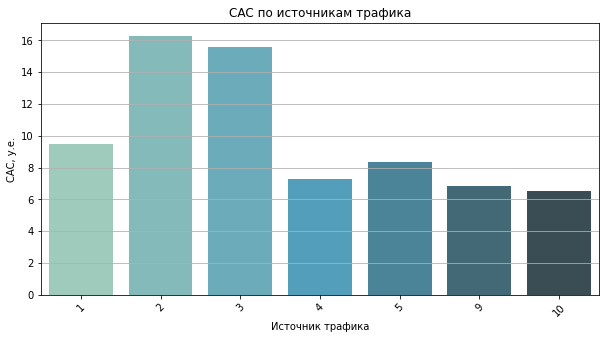

In [68]:
plt.figure(figsize=(10,5))
plt.title('CAC по источникам трафика')
plt.grid()
sns.barplot(data=costs_per_buyer,x='source_id', y='costs_per_buyer', palette='GnBu_d')
plt.xlabel('Источник трафика')
plt.xticks(rotation=45)
plt.ylabel('CAC, у.е.')
plt.show()

##### Выводы:

* наибольшая стоимость привлечения одного покупателя приходится на источники 2 и 3 (более 15 у.е. на покупателя), наименьшая – на источники 9 и 10 (менее 10 у.е. на покупателя).

#### Расчёт CAC в разрезе устройств


In [69]:
buyers_daily_device = buyers.groupby(['device', 'source_id','first_order_dt']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
buyers_daily_device.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily_device['dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

costs_cac_device = pd.merge(buyers_daily_device, costs, on=['source_id', 'dt'])
costs_cac_device['costs_per_buyer'] = costs_cac_device['costs'] / costs_cac_device['n_buyers']

In [70]:
costs_per_buyer_device = costs_cac_device.groupby('device')[['costs_per_buyer']].mean()
costs_per_buyer_device

,costs_per_buyer
device,
desktop,13.920652
touch,37.300433


In [71]:
costs_per_buyer_device = costs_per_buyer_device.reset_index()

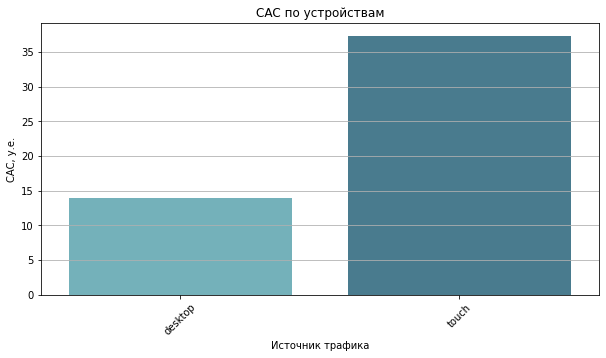

In [72]:
plt.figure(figsize=(10,5))
plt.title('CAC по устройствам')
plt.grid()
sns.barplot(data=costs_per_buyer_device,x='device', y='costs_per_buyer', palette='GnBu_d')
plt.xlabel('Источник трафика')
plt.xticks(rotation=45)
plt.ylabel('CAC, у.е.')
plt.show()

##### Выводы:

* стоимость привлечения одного пользователя для стационарных устройств почти в 3 раза меньше (13.9 у.е.), чем для сенсорных;
* стоимость привлечения одного пользователя для сенсорных устройств составили 37.3 у.е.;

#### Расчёт ROMI по когортам в разрезе источников.

Посчитаем насколько окупаются маркетинговые затраты на одного полкупателя, для этого посчитаем LTV по источникам трафика, а далее по формуле `ROMI = LTV / CAC` вычислим окупаемость маркетинговых затрат в разразе источников.

In [73]:
visits=visits_copy
orders=orders_copy

Для расчета LTV и ROMI применим когортный анализ.

In [74]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

users = visits.sort_values('start_ts').groupby('uid').first()

# нам необходимо получить source_id первого посещения для каждого пользователя из таблицы orders, для этого создадим users с этими данными
orders = orders.join(first_order_date,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# объединим таблицу с source_id с данными по заказам пользователей
orders = orders.join(users,on='uid')

In [75]:
# группируем данные по источнику трафика, месяцу первой покупки и месяцу покупки (для расчета продолжительности жизни когорты)
orders_grouped_by_cohorts = orders.groupby(['source_id','first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})
orders_grouped_by_cohorts

revenue  uid
source_id first_order_month order_month              
1         2017-06-01        2017-06-01   1378.70  268
                            2017-07-01    414.98   80
                            2017-08-01    419.43   87
                            2017-09-01    714.24  119
                            2017-10-01    811.20  114
...                                          ...  ...
10        2018-03-01        2018-03-01    638.44  218
                            2018-04-01     12.71    5
                            2018-05-01      6.29    3
          2018-04-01        2018-04-01    261.93  112
          2018-05-01        2018-05-01    470.89  144

[516 rows x 2 columns]

In [76]:
# имея данные о доходах каждого источника по месяцам и количестве покупаетелй считаем ltv
orders_grouped_by_cohorts['ltv'] = (orders_grouped_by_cohorts['revenue'] * margin_rate) / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts

revenue  uid       ltv
source_id first_order_month order_month                        
1         2017-06-01        2017-06-01   1378.70  268  5.144403
                            2017-07-01    414.98   80  5.187250
                            2017-08-01    419.43   87  4.821034
                            2017-09-01    714.24  119  6.002017
                            2017-10-01    811.20  114  7.115789
...                                          ...  ...       ...
10        2018-03-01        2018-03-01    638.44  218  2.928624
                            2018-04-01     12.71    5  2.542000
                            2018-05-01      6.29    3  2.096667
          2018-04-01        2018-04-01    261.93  112  2.338661
          2018-05-01        2018-05-01    470.89  144  3.270069

[516 rows x 3 columns]

In [77]:
# считаем возрасты для каждой когорты
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']) / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')


Text(87.0, 0.5, 'Источник')

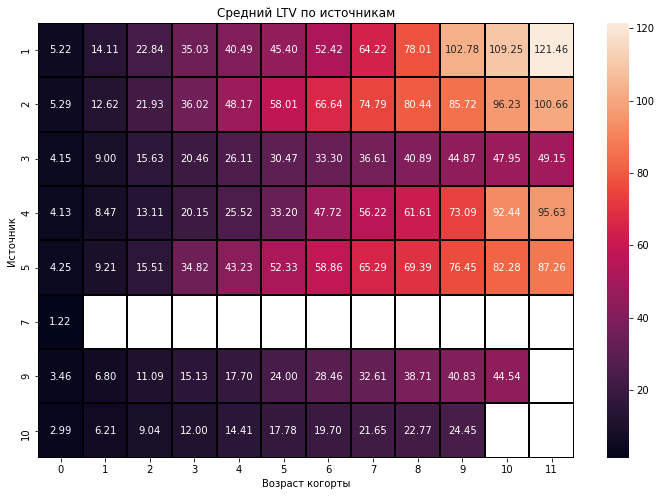

In [78]:
# выводим тепловую карту среднего ltv по источникам по каждому месяцу
ltv_by_source = orders_grouped_by_cohorts.pivot_table(index='source_id',columns='cohort_lifetime',values='ltv',aggfunc='mean').cumsum(axis=1).round(3)
plt.figure(figsize=(12, 8))
plt.title('Средний LTV по источникам')

sns.heatmap(ltv_by_source, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты')
plt.ylabel('Источник')

In [79]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.merge(costs_per_buyer, on='source_id', how='left')

In [80]:
orders_grouped_by_cohorts['romi'] = orders_grouped_by_cohorts['ltv'] /  orders_grouped_by_cohorts['costs_per_buyer']

In [81]:
romi_by_source = orders_grouped_by_cohorts.pivot_table(index='source_id',columns='cohort_lifetime',values='romi',aggfunc='mean')
romi_by_source.cumsum(axis=1).round(2)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.55,1.49,2.41,3.69,4.27,4.78,5.52,6.77,8.22,10.83,11.51,12.80
2,0.32,0.78,1.35,2.21,2.96,3.56,4.09,4.59,4.94,5.26,5.91,6.18
3,0.27,0.58,1.00,1.31,1.68,1.96,2.14,2.35,2.62,2.88,3.08,3.15
4,0.57,1.17,1.80,2.77,3.51,4.57,6.56,7.73,8.47,10.05,12.71,13.15
5,0.51,1.10,1.86,4.18,5.18,6.28,7.06,7.83,8.32,9.17,9.87,10.47
9,0.51,0.99,1.62,2.21,2.59,3.51,4.16,4.77,5.66,5.97,6.51,NaN
10,0.46,0.95,1.38,1.83,2.20,2.71,3.00,3.30,3.47,3.73,NaN,NaN


Text(87.0, 0.5, 'Источник')

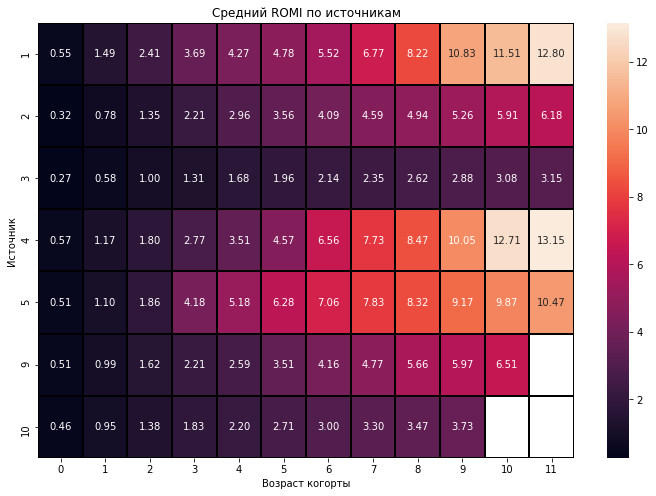

In [82]:
plt.figure(figsize=(12, 8))
plt.title('Средний ROMI по источникам')

sns.heatmap(romi_by_source.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты')
plt.ylabel('Источник')

In [83]:
# сравним окупаемость маркетинговых расходов каждого источника за одинкаовый период жизни с LTV, CAC и ROMI
ltv_6th_month = ltv_by_source.loc[:,5].to_frame()
ltv_6th_month.rename(columns={5: 'ltv'}, inplace=True)
ltv_6th_month = ltv_6th_month.merge(costs_per_buyer, on='source_id')
ltv_6th_month['romi'] = ltv_6th_month['ltv'] / ltv_6th_month['costs_per_buyer']
ltv_6th_month

,source_id,ltv,costs_per_buyer,romi
0,1,45.401,9.489732,4.784224
1,2,58.006,16.287024,3.561486
2,3,30.474,15.580474,1.955910
3,4,33.198,7.271743,4.565343
4,5,52.334,8.336731,6.277521
5,9,24.005,6.842532,3.508204
6,10,17.780,6.555415,2.712262


##### Выводы:

* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются расходы на источники трафика 5, 1 и 4, хуже – источник 3.
* покупатели, пришедшие по источнику 3, приносят меньше денег, чем покупатели, пришедшие из других источников (кроме 9 и 10), несмотря на высокую долю расходов этого источника в период исследования.

#### Расчёт ROMI по когортам в разрезе устройств.

In [84]:
orders_grouped_by_cohorts_device = orders.groupby(['device','first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})
orders_grouped_by_cohorts_device['ltv'] = (orders_grouped_by_cohorts_device['revenue'] * margin_rate) / orders_grouped_by_cohorts_device['uid']
orders_grouped_by_cohorts_device = orders_grouped_by_cohorts_device.reset_index()
orders_grouped_by_cohorts_device['cohort_lifetime'] = (orders_grouped_by_cohorts_device['order_month'] - orders_grouped_by_cohorts_device['first_order_month']) / np.timedelta64(1,'M')
orders_grouped_by_cohorts_device['cohort_lifetime'] = orders_grouped_by_cohorts_device['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts_device = orders_grouped_by_cohorts_device.merge(costs_per_buyer_device, on='device', how='left')
orders_grouped_by_cohorts_device['romi'] = orders_grouped_by_cohorts_device['ltv'] /  orders_grouped_by_cohorts_device['costs_per_buyer']
romi_by_device = orders_grouped_by_cohorts_device.pivot_table(index='device',columns='cohort_lifetime',values='romi', aggfunc='mean')
ltv_by_device = orders_grouped_by_cohorts_device.pivot_table(index='device',columns='cohort_lifetime',values='ltv', aggfunc='mean')


Text(87.0, 0.5, 'Устройство')

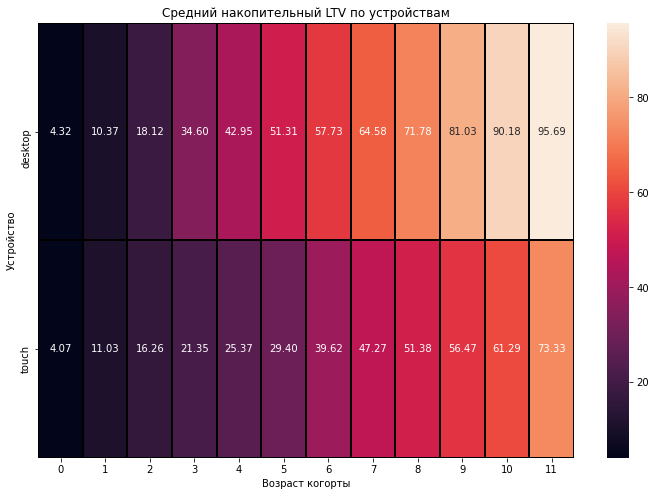

In [85]:
plt.figure(figsize=(12, 8))
plt.title('Средний накопительный LTV по устройствам')

sns.heatmap(ltv_by_device.cumsum(axis=1).round(3), annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты')
plt.ylabel('Устройство')

Text(87.0, 0.5, 'Устройство')

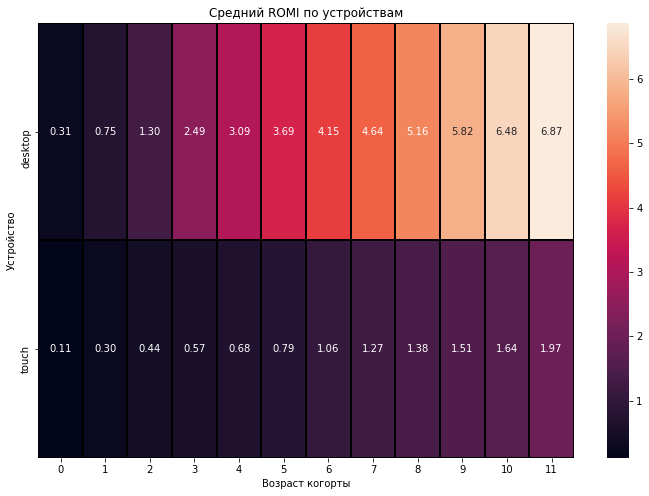

In [86]:
plt.figure(figsize=(12, 8))
plt.title('Средний ROMI по устройствам')

sns.heatmap(romi_by_device.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты')
plt.ylabel('Устройство')

##### Выводы:

* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются маркетинговые расходы для стационарных устройств.
* маркетинговые расходы окупаются для всех устройств, но для стационарных лучше и приносят больше прибыли сверху к 6-му и 12-му месяцу.

Text(87.0, 0.5, 'Когорта')

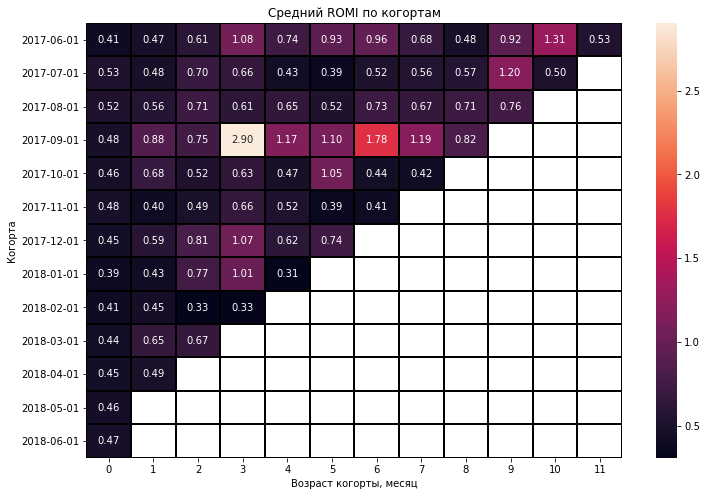

In [87]:
romi_cohorts = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='romi',aggfunc='mean')
plt.figure(figsize=(12, 8))
plt.title('Средний ROMI по когортам')
romi_cohorts.index = romi_cohorts.index.strftime('%Y-%m-%d')
sns.heatmap(romi_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='black') 
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')

Для сравнительного анализа исследуем ROMI когорт, проживших 6 месяцев и более. 

##### Выводы:

* когорта сентября 2017 года была самой прибыльной на 6-й месяц жизни (ROMI равен 1.10), прибыль составила 10%;
* не окупили свои затраты в 6-й месяц когорты июня-августа и ноября-декабря 2017 года;
* ROMI больше 1 наблюдался у когорты октября 2017 года (1.05);
* за весь период жизни высокие значения ROMI наблюдалсиь у когорты сентября 2017 года (2.9 в 4-й месяц и 1.78 в 7-й);
* за весь период наблюдений когорт, проживших 6 или более месяцев, ROMI не был больше 1 у августовской и ноябрьской когорт;
* в целом можно сказать, что ROMI мало подвержен влиянию сезонности, подобных закономерностей при анализе не обнаружено.

## Часть 4. Выводы и рекомендации

<a id='section_4_1'></a>

### 4.1. Определение источника трафика и типа устройств, на которые маркетологам стоит делать упор.

#### Источник трафика

* В результатае расчета ROMI было определено, что к 6-му месяцу окупаютсся все маркетинговые расходы на источники трафика. Лучшим образом окупаются источники 4, 5 и 1, к 12-му месяц окупаемость расходов этих источников составила 13.15, 10.47 и 12.80 соответственно. 

* Хуже всего на протяжении всей продложительности окупаются расходы на источник 3, к 12-му месяц ROMI составил 3.15, то есть расходы на этот источник принесли сверху 215% прибыли, что является худшим результатом среди источников проживших 12 месяцев.

Расчитаем распределение расходов по типам источника

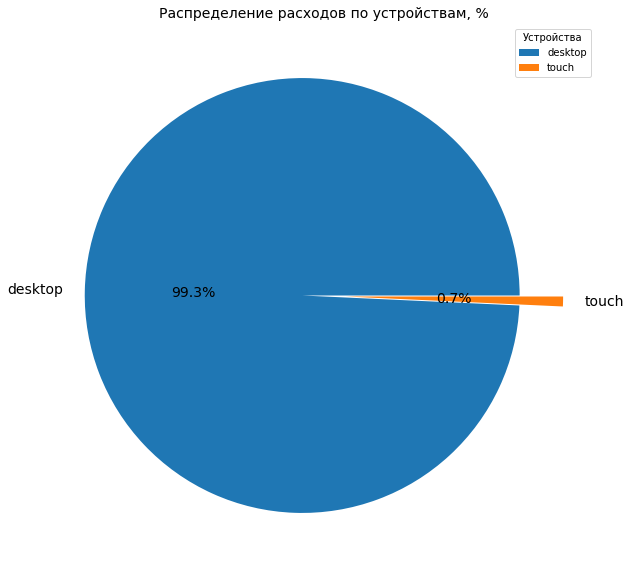

In [88]:
costs_per_buyer_device = costs_cac_device.groupby('device')[['costs']].sum()
costs_per_buyer_device = costs_per_buyer_device.reset_index()
pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x=costs_per_buyer_device['costs'], autopct="%.1f%%", explode=(0.1,0.1), labels=costs_per_buyer_device['device'], pctdistance=0.5, 
       textprops={'fontsize': 14})
plt.legend(title = 'Устройства')
plt.title("Распределение расходов по устройствам, %", fontsize=14);


In [89]:
costs_per_buyer_device

,device,costs
0,desktop,326484.16
1,touch,2404.86


#### Тип устройства

* сравнивая средние показатели Retention Rate в первые 6 месяцев жизни когорт можно сказать, пользователи ПК охотнее возвращаются к услугам онлайн-сервиса, чем пользователи сенсорных устройств вполне возможно из-за удобства использования сервисом на ПК;
* маркетинговые расходы в основном направлены на источники, связанные со стационарными устройствами;
* количество уникальных пользователей, среднее число сессий и их средняя длительность значительно выше для стационарных устройств, чем для сенсорных;
* к 6-му месяцу жизни пожизненная ценность клиента стационарного устройства была выше, чем для сенсорного устройства на 20 у.е.;
* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются маркетинговые расходы для стационарных устройств;
* маркетинговые расходы окупаются для всех устройств, но для стационарных лучше и приносят больше прибыли сверху к 6-му и 12-му месяцу.

<a id='section_4_2'></a>

### 4.2. Описание выводов для подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.

#### Продуктовые метрики

* По результатам расчета и анализа продуктовых метрик можно сделать вывод, что на пользовательскую активность влияет сезонность, то есть в период зимних праздников пользовательская активность растет, а конкретно: MAU, WAU, количество и средняя продолжительность сессий в день. Также стоит отметить, что высокий показатель Retention Rate для когорт наблюдался в тот месяц жизни, который попадал в описанный выше период.

#### Метрики электронной коммерции

* Эти метрики в отличии от продуктовых не имеют влияние сезонности, например, средний месячный чек на пользователя наоборот снижался в периоды высокой пользовательской активности, что говорит о том, что пользователи совершали покупки по скидкам, либо в покупали подарки по-дешевле. В среднем на одного клиента приходится от 1 до 2 покупок, кроме когорты июня 2017 года, чьи показатели к 12-му месяцу достигали 2.1 покупки на клиента. По LTV также нельзя определить закономерность изменений показателей по сезонности, на 6-й месяц жизни когорты демонстритровали разные показатели, наибольший был для когорты сентября 2017 года (12.31 у.е).

#### Маркетинговые метрики 

* В рамках расчёта и анализа этих метрик была определена эффективность маркетинговых затрат на источники трафика, в результате все источники трафика оказались окупаемыми, но приносили разную прибыль сверху. Анализ распределения маркетинговых расходов показал, что примерно половину маркетинговых расходов составляли затраты на источник 3, однако по согласно расчётам ROMI было определено, что эти затраты являются неэффективными, так как приносят меньше всего прибыли сверху, всего лишь 95%. В итоге самыми прибыльными вложениями были для источников 5, 4 (около 15% от общей суммы расходов) и 1 (около 6% от общей суммы расходов).

<a id='section_4_3'></a>

### 4.3. Подведение итогов когортного анализа.

#### Среднее время с момента посещения сайта до покупки по когортам

* В среднем пользователи начинают совершать покупку через полмесяца после первого посещения сайта;
* наибольшее количество дней с момента посещения сайта до первой покупки наблюдалось летом 2017 года, когда показатель не опускался ниже 30 дней (1 месяц);
* с июля по май наблюдалось снижение значения метрики, но снижение в месяцы уменьшения пользовательской активности (февраль-май) можно объяснить границами периода исследования, те кто посещали сайт впервые могли не совершить покупку в период исследования;
* к сезону распродаж и зимних праздников (период повышения пользовательской активности) время от первого посещения до первой покупки уменьшается.

#### Среднее количество покупок на одного клиента

* каждая когорта в 0-й месяц жизни в среднем совершала не более 1.2 покупки на пользователя;
* когорта июня 2017 года имела наибольший прирост рассматриваемого показателя относительно остальных когорт;
* с каждым месяцем жизни когорты среднее количество покупок на пользователя имело тенденцию к постепенному росту;
* к 5-му месяцу жизни каждая когорта в среднем совершала не менее 1.3 покупки на пользователя;
* наибольший показатель среднего количества покупок на одного пользователя в 5-м месяце жизни когорты наблюдался для когорты июля 2017 года (1.7), 5-й месяц жизни этой когорты – ноябрь, месяц с высокой пользовательской активностью;
* наименьший показатель среднего количества покупок на одного пользователя в 5-м месяце жизни когорты наблюдался для когорты октября 2017 года (1.33), 5-й месяц жизни этой когорты – март, в этот период происходит снижение пользовательской активности.

#### Изменение накопительного LTV по когортам

* средний ltv на 5-й месяц жизни был наивысшим для когорты сентября 2017 года, то есть в феврале клиенты этой когорты в среднем приносили сервису 12.31 у.е.;
* средний ltv на 5-й месяц жизни был наименьшим для когорты октября 2017 года, то есть в марте клиенты этой когорты в среднем приносили сервису 6.16 у.е.;
* в целом средний ltv рос с каждым месяцем у каждой когорты;
* высокий темп роста показателя наблюдался для когорт сентрябя 2017 года, низкий темп роста – для когорт октября и ноября 2017 года.


#### ROMI в разрезе источников

* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются расходы на источники трафика 5, 1 и 4, хуже – источник 3.
* покупатели, пришедшие по источнику 3, приносят меньше денег, чем покупатели, пришедшие из других источников (кроме 9 и 10), несмотря на высокую долю расходов этого источника в период исследования.

#### ROMI в разрезе устройств

* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются маркетинговые расходы для стационарных устройств.
* маркетинговые расходы окупаются для всех устройств, но для стационарных лучше и приносят больше прибыли сверху к 6-му и 12-му месяцу.

#### Суммарный ROMI по когортам

* когорта сентября 2017 года была самой прибыльной на 6-й месяц жизни (ROMI равен 1.10), прибыль составила 10%;
* не окупили свои затраты в 6-й месяц когорты июня-августа и ноября-декабря 2017 года;
* ROMI больше 1 наблюдался у когорты октября 2017 года (1.05);
* за весь период жизни высокие значения ROMI наблюдалсиь у когорты сентября 2017 года (2.9 в 4-й месяц и 1.78 в 7-й);
* за весь период наблюдений когорт, проживших 6 или более месяцев, ROMI не был больше 1 у августовской и ноябрьской когорт;
* в целом можно сказать, что ROMI мало подвержен влиянию сезонности, подобных закономерностей при анализе не обнаружено.

<a id='section_4_4'></a>

### 4.4. Описание различий метрик в разрезе устройств.

#### Продуктовые метрики

* Пользователи стационарных устройств имеют большую пользовательскую активность, чем пользователи сенсорных устройств, что выражается в метриках WAU, MAU, среднем количестве сессий в день, неделю и месяц, длительности пользовательской сессии, а также в Retention Rate, который показал, что пользователи стационарных устройств чаще возвращаются к услугам онлайн-сервиса.

#### Метрики электронной коммерции

* LTV клиента больше для стационарных устройств, чем для сенсорных: к 6-му месяцу жизни покупатель стационарного устройства приносит в среднем 51 у.е., что на 20 у.е. больше, чем за этот же период приносит покупатель сенсорного устройства.

#### Маркетинговые метрики

* маркетинговые расходы в основном направлены на источники, связанные со стационарными устройствами;
* в результате расчёта ROMI для 6-го месяца жизни можно сказать, что лучше окупаются маркетинговые расходы для стационарных устройств.
* маркетинговые расходы окупаются для всех устройств, но для стационарных лучше и приносят больше прибыли сверху к 6-му и 12-му месяцу

В результате анализа метрик можно сказать, что онлайн-сервис направлен на стационарные устройства.